Heart Failure Outline
* [1.	Import Libraries](#1_Import_Libraries)
* [2.	Import Dataset and Inspect Data  ](#2_Import_Dataset)  
    *[a.	Read file and print a sample of 10 entries](#a_Read_file)
b.	Print the shape of the data  
c.	Investigate the types of data  
d.	Describe all columns  
e.	Boolean categorical variables  
f.	Check for missing values  
3.	Exploratory Data Analysis  
a.	Investigate the distributions of feature values  
b.	Distribution of death event by age  
c.	Distribution of age by gender  
d.	Investigating correlation  
i.	Seaborn PairPlot  
e.	Exploration of covariance  
i.	Covariance Matrix  
f.	Investigating variable distributions  
i.	Distribution of death event by age and gender  
ii.	Distribution of diabetes by death event and age  
iii.	Distribution of smoking by death event and age  
iv.	Distribution of serum creatine and death event by gender  
v.	Distribution of high blood pressure by death event and age  
vi.	Distribution of serum sodium by death event and gender  
vii.	Distribution of anaemia by death event and age  
viii.	Distribution of creatinine phosphokinase by death event and gender  
ix.	Distribution of ejection fraction by death event and gender  
4.	Exploration of ejection fraction  
a.	What’s normal  
b.	Correlation between serum sodium levels and ejection fraction  
c.	Correlation between serum  sodium levels and death event  
d.	Correlation between ejection fraction and death event  
e.	Correlation between serum creatinine and death event  
f.	Correlation  between ejection fraction and smoking  
g.	Correlation between ejection fraction and platelets  
h.	Correlation between ejection fraction and creatinine phosphokinase  
i.	Correlation between ejection fraction and serum creatinine  
j.	 Correlation between serum creatinine and age  
5.	Linear regression model between all variables and death event  
a.	Predicting ejection fraction based on serum sodium  
i.	Subset data  
ii.	Create train test split  
iii.	Verify data shapes  
iv.	Instantiate linear regression model and fit to data  
v.	Use model to form predictions  
vi.	Calculate R Squared and other metrics  
vii.	Create data frame of actual and predicted values  
viii.	Sample of results data frame   
ix.	Plot actual versus predicted ejection fraction  
x.	Cross validation  
6.	Modeling  
a.	Model 1: Decision tree entropy model  
i.	Subset data  
ii.	Create train tests split  
iii.	Instantiate decision tree entropy model  
iv.	Use model to make predictions  
v.	Visualize decision tree  
vi.	Model evaluation metrics  
b.	Model 2: Decision tree gini model  
i.	Instantiate decision tree entropy model  
ii.	Use model to make predictions  
iii.	Visualize decision tree  
iv.	Model evaluation metrics  
v.	Conclusion  
c.	Model 3: Modeling with less features  
i.	Evaluating the features based on covariance  
ii.	Subset data  
iii.	Create train tests split  
iv.	Instantiate decision tree entropy model  
v.	Use model to make predictions  
vi.	Visualize decision tree  
vii.	Model evaluation metrics  
viii.	Plot confusion matrix  
ix.	Calculate and plot ROC   


# 1. Import Libraries<a id='1_Import_Libraries'></a>

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

from pandas_profiling import ProfileReport
from sklearn import linear_model, preprocessing, tree, metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from io import StringIO  
from IPython.display import Image  
from sklearn.ensemble import RandomForestClassifier


# 2. Import Dataset and Inspect Data<a id='2_Import_Dataset'></a>

### a. Read file and print a sample of 10 entries<a id='a_Read_file'></a>

In [2]:
heart_data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_data.sample(10)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
125  43.0        1                       358         0                 50   
144  72.0        1                       943         0                 25   
69   65.0        0                       113         1                 25   
102  80.0        0                       898         0                 25   
145  50.0        0                       185         0                 30   
173  50.0        1                       115         0                 20   
142  50.0        0                       482         1                 30   
209  49.0        0                       972         1                 35   
180  40.0        0                       478         1                 30   
206  40.0        1                       101         0                 40   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
125                    0   237000.0              1.30           135    0   
144                    1   338000.0              1.70           139    1   
69                     0   497000.0              1.83           135    1   
102                    0   149000.0              1.10           144    1   
145                    0   266000.0              0.70           141    1   
173                    0   189000.0              0.80           139    1   
142                    0   329000.0              0.90           132    0   
209                    1   268000.0              0.80           130    0   
180                    0   303000.0              0.90           136    1   
206                    0   226000.0              0.80           141    0   

     smoking  time  DEATH_EVENT  
125        0    97            0  
144        1   111            1  
69         0    67            1  
102        1    87            0  
145        1   112            0  
173        0   146            0  
142        0   109            0  
209        0   187            0  
180        0   148            0  
206        0   187            0

### b. Print the shape of the file so we know the number of columns and entries  

There are 299 entries across 13 columns.

In [3]:
heart_data.shape

(299, 13)

### c. Investigate the types of data that we have.  
We can see that all of our data is of a numeric type, even categories like sex, or high blood pressure.  
This also gives us a chance to look at the column names.


In [4]:
heart_data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

### d. Describe all columns  

Here we can get a look at the type of data we are dealing with.  
Some of the columns such as Sex are Boolean, having simply a 1 or 0 to denote the sex of the subject.

In [5]:
heart_data.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_blood_pressure       299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
sex                       299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
DEATH_EVENT               299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_blood_pressure            0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
sex                            0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
DEATH_EVENT                    0.0       0.0       1.0       1.0

### e. Boolean categorical variables  
Our Binary Variables are as follows:  
Sex - 1 = Male, 0 = Female  
  
1 = Yes, 0 = No, for the following: Anaemia, Diabetes, High Blood Pressure, Smoking, Death Event. 

### e. Check for missing values  

Our data table is complete with no missing values.

In [6]:
missing = pd.concat([heart_data.isnull().sum(), 100 * heart_data.isnull().mean()], axis=1)
missing.columns=['Count', '%']
missing.sort_values(by='Count')

Count    %
age                           0  0.0
anaemia                       0  0.0
creatinine_phosphokinase      0  0.0
diabetes                      0  0.0
ejection_fraction             0  0.0
high_blood_pressure           0  0.0
platelets                     0  0.0
serum_creatinine              0  0.0
serum_sodium                  0  0.0
sex                           0  0.0
smoking                       0  0.0
time                          0  0.0
DEATH_EVENT                   0  0.0

# 3. Exploratory Data Analysis

### a. Investigate the distributions of feature values   
Here we can get an idea of how are values are distributed, easily seperating the binary values form those with a range, and evaluating the distribution of the binary values. For instance we have less subjects that are anemic then those who are not.


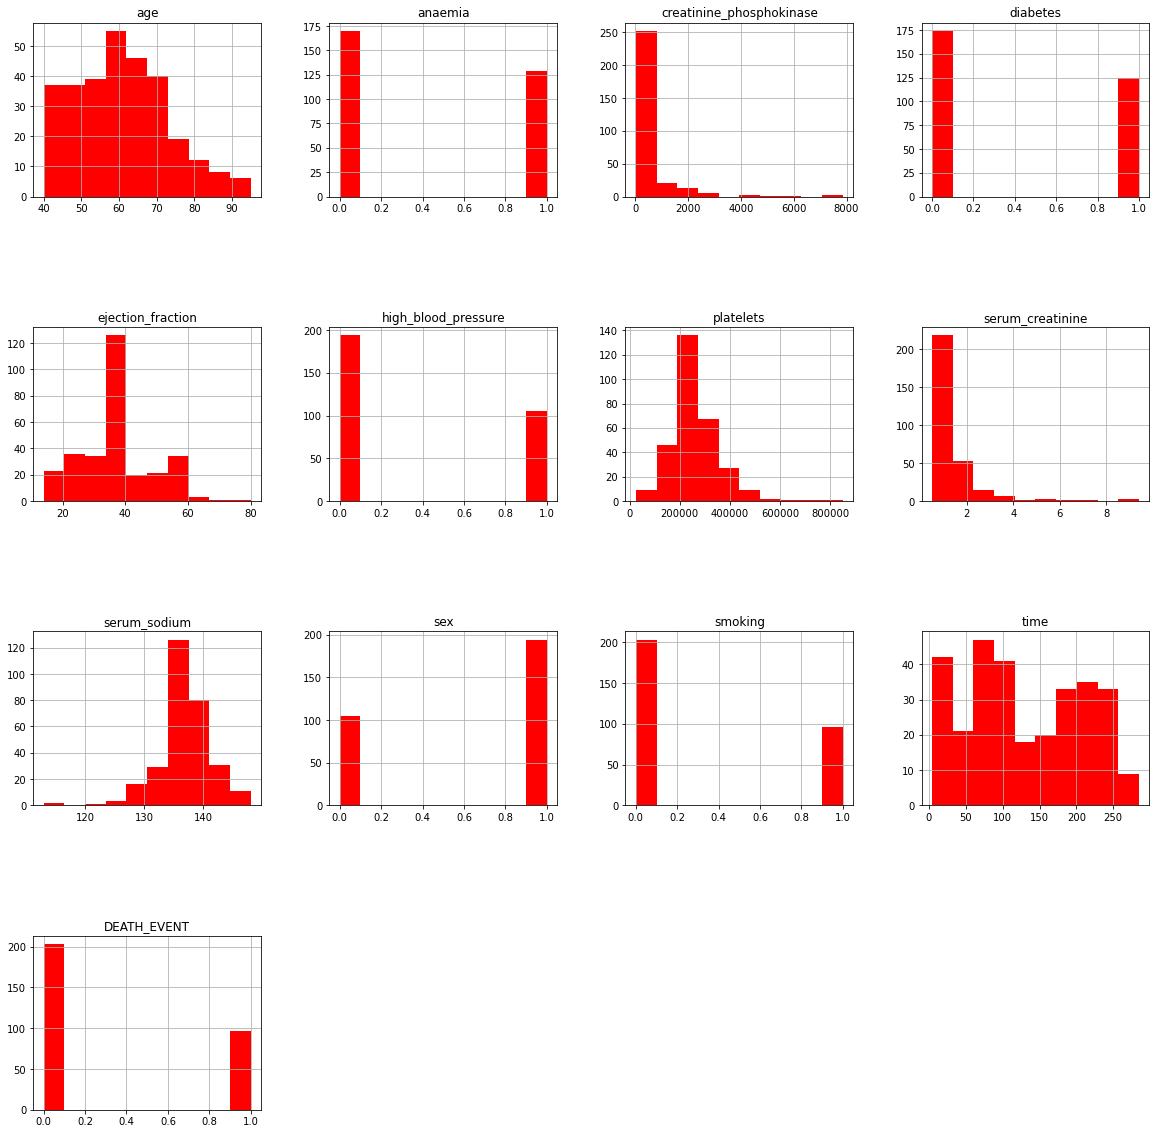

In [7]:
heart_data.hist(figsize=(20,20), color='r')
plt.subplots_adjust(hspace=.75);

### b. Distribution of Death Event by Age

Of our 299 subjects 96 suffered a death event. We show the distribution of the subjects ages at death. As compared to the overall distribution of age amoung the subjects.   
  
The two histograms are basically the same shape, showing that age does not play a large roll in the cause of a death event. Looking more closely shows that the bars towrads the right of the death histogram are a bit taller than the ones in the age distribution, while the bars to the left are shorter. This indicates that older subjects die at a higher rate than the young subjects, but we don't have enough information to see a correlation betweed age and death event.

In [8]:
heart_data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [9]:
death_age = pd.DataFrame(heart_data.loc[heart_data['DEATH_EVENT'] == 1, 'age'])

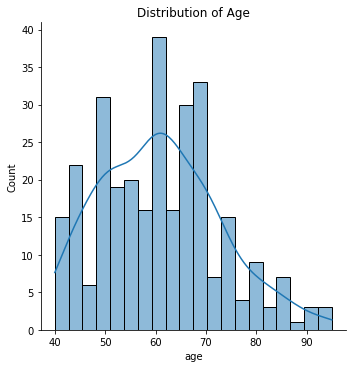

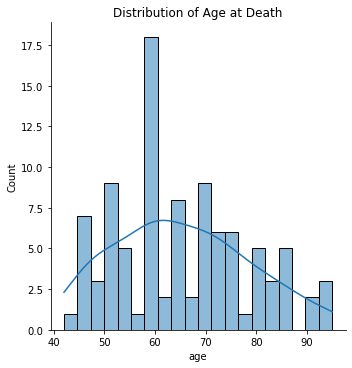

In [10]:
sns.displot(heart_data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
sns.displot(death_age['age'], bins=20, kde=True)
plt.title('Distribution of Age at Death');

### c. Distribution of age by gender
  
You can see that the majority of the ages fall between 40 and 80.  
The largest distribution of males is just about 60, while the largest distribution of females is a bit higher.  
There is one outlier in the female age disribution.

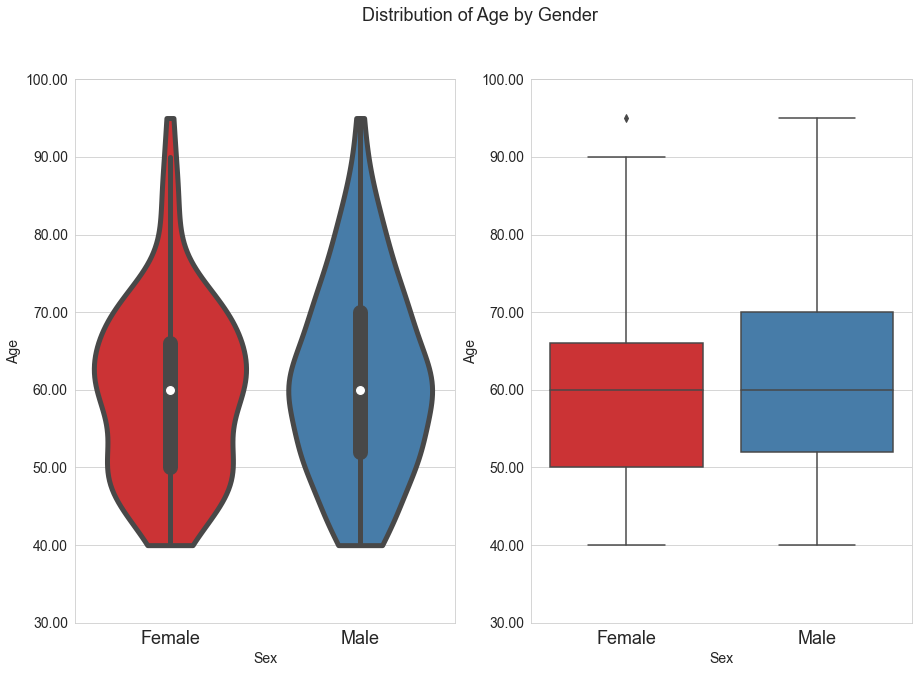

In [11]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Distribution of Age by Gender', fontsize=18)
x='sex'
xlabel='Sex'
xticks=['Female', 'Male']
y='age'
yticks = ['30', '40', '50', '60', '70', '80', '90', '100']
ylabel='Age'
hue=''

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)

b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18);
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14);

### d. Investigating correlation  
We're going to use the Seaborn Pairplot function to see if there are any strongly correlated variables.  
  
__-- As an example__

The graph below, taken from a study on college admissions shows a very strong correlation between GPA and the chance of admission.

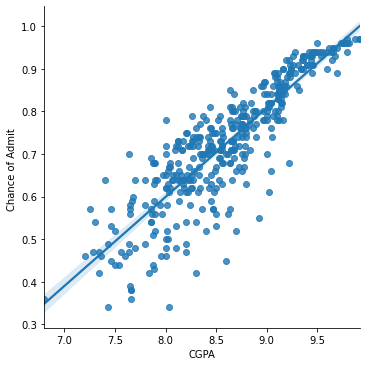

Looking at the charts below we don't see a strong correlation between any of the variables.  

#### -- i. Using Seaborn PairPlot

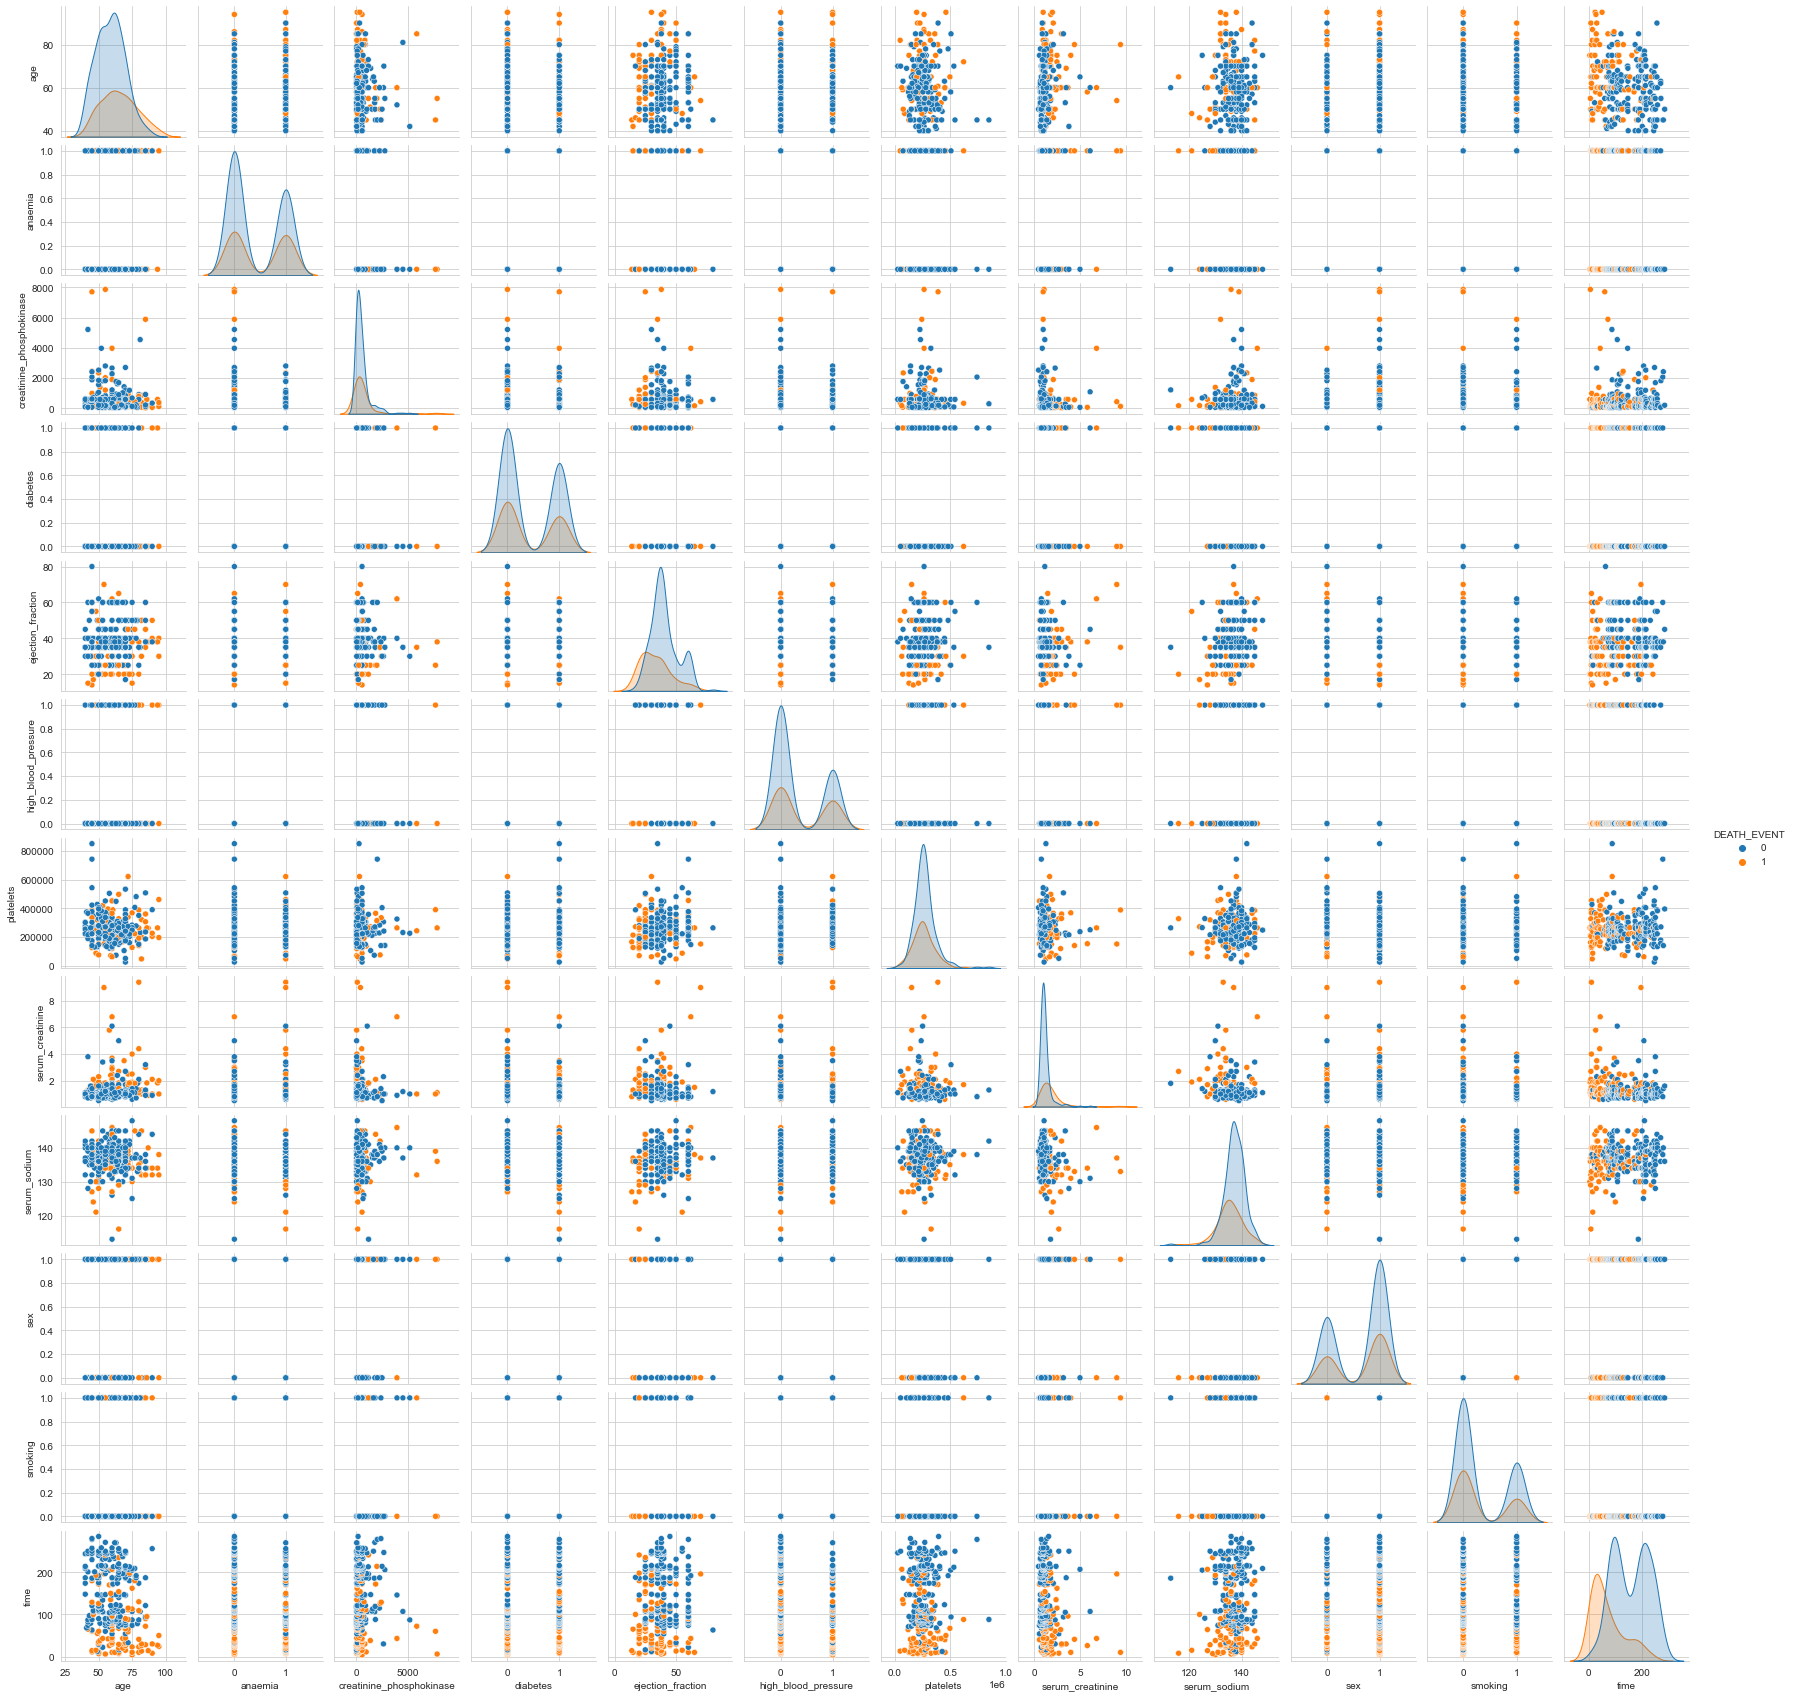

In [12]:
cols = heart_data.columns.tolist()
sns.pairplot(heart_data[cols], height=2.0, hue='DEATH_EVENT');

### e. Exploration of Covariance  

Our covariance matrix below reports a number from -1, meaning strong negative correlation, to 1, strong correlation, with 0 meaning no correlation.  

Looking at the Death Event row, we see the strongest correlation between Time and Death Event. We see notable correlation (above 0.05) between Death Event and: Serum Creatinine, Ejection Fraction, Serum Sodium, High Blood Pressure, and Creatine Phosphokinase. Age also seems to be a factor, but it's hard to tell if it contributes to heart disease or if it's just natural causes.


#### -- i. Covariance Matrix

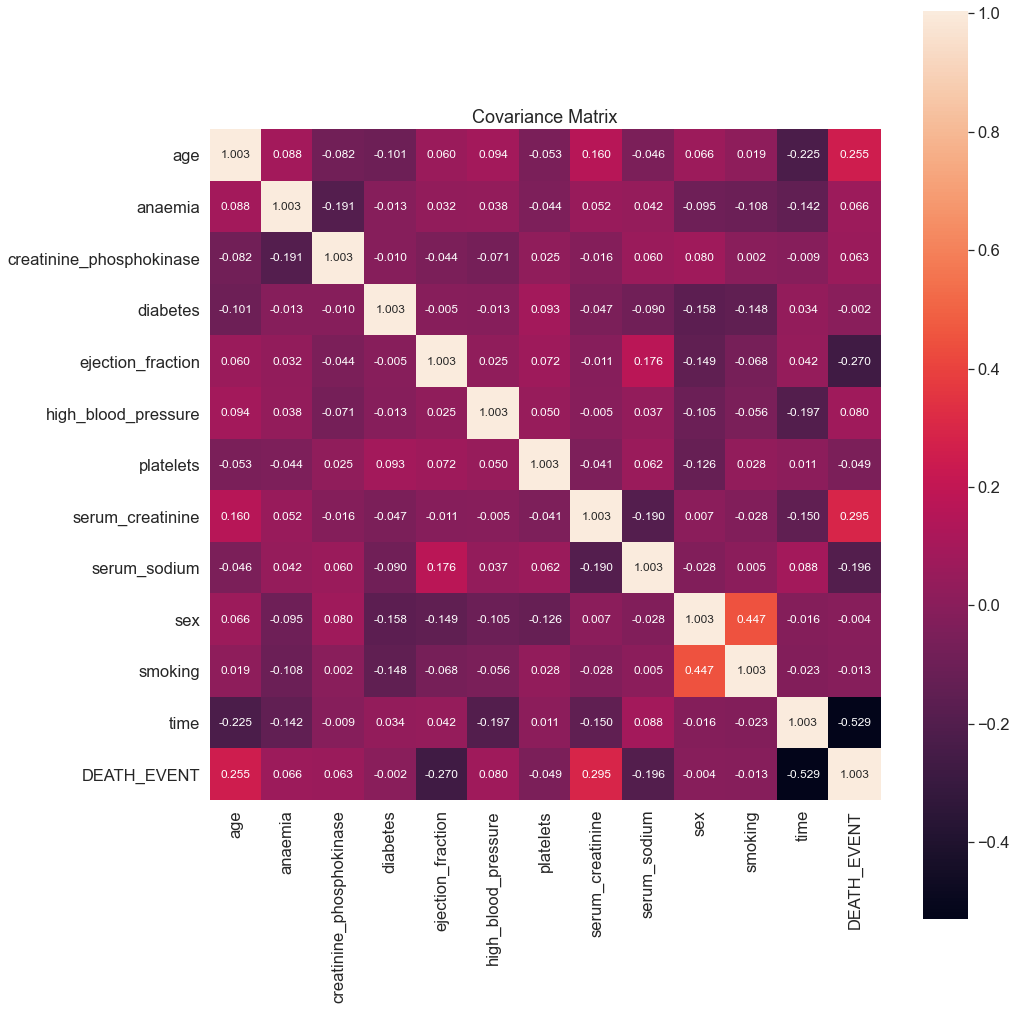

In [13]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_std = stdsc.fit_transform(heart_data[cols].iloc[:, range(0,13)].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(15,15))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.3f', annot_kws={'size':12}, yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

### f. Investigating variable distributions  
  
Plots of the distributions of our fearures allows us to get an understanding of the data itself. The violin plots allow us to see how the data is dristributed and the box plots allow us to check for outliers.

#### -- i. Distribution of death event by age and gender  
Looking at the plot we see that the mean age of death for women is 60, while the mean age of death for men is 65. It seems that women tend to live longer overall.

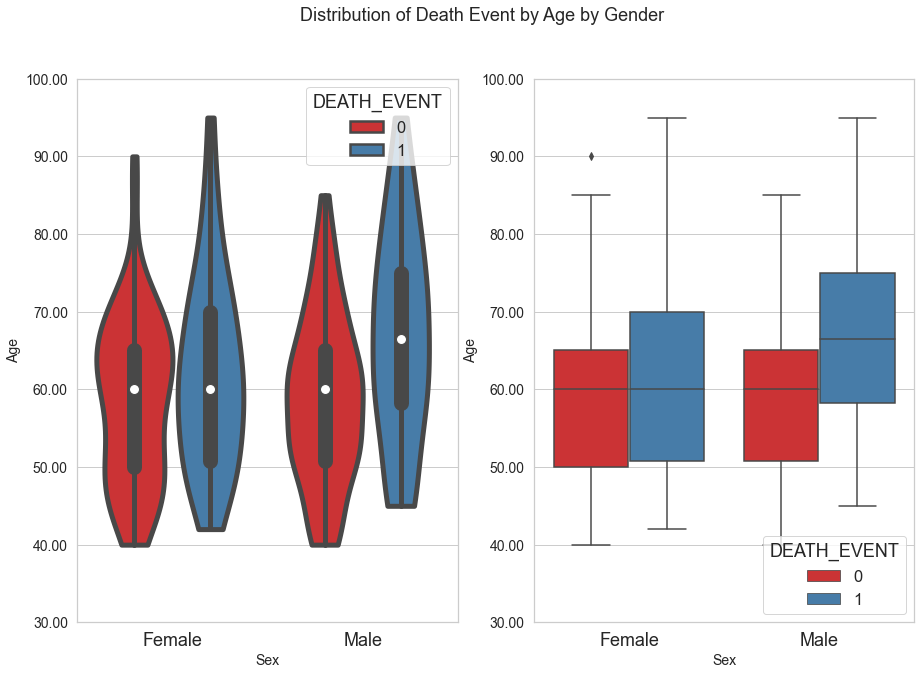

In [14]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Distribution of Death Event by Age by Gender', fontsize=18)
x='sex'
xlabel='Sex'
xticks=['Female', 'Male']
y='age'
yticks = ['30', '40', '50', '60', '70', '80', '90', '100']
ylabel='Age'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)

b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18);
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14);

#### -- ii. Distribution of diabetes and death event by age
People who have diabetes tend to die at a younger age.

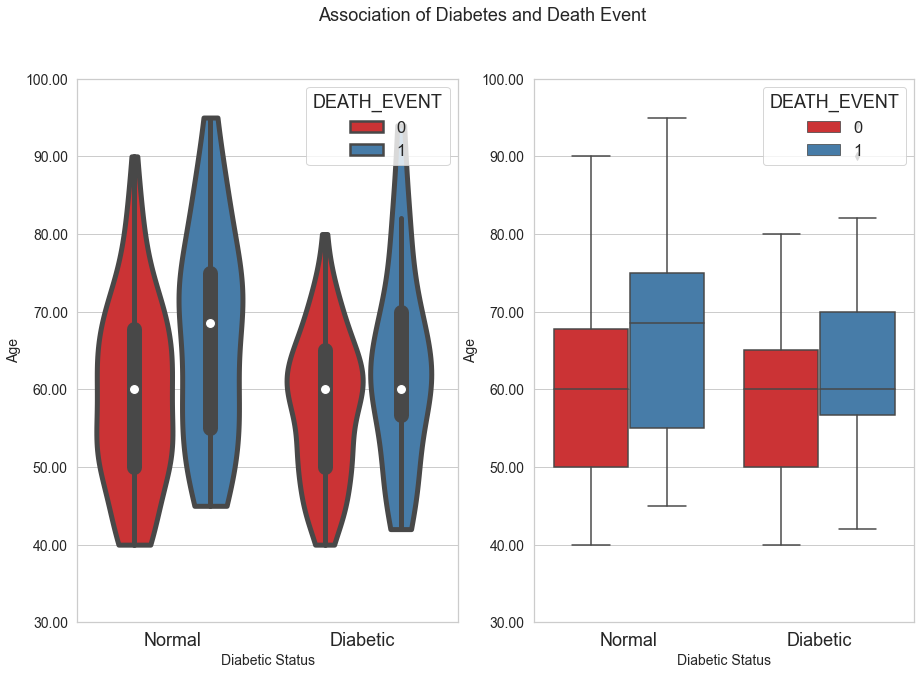

In [15]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of Diabetes and Death Event', fontsize=18)
x='diabetes'
xlabel='Diabetic Status'
xticks=['Normal', 'Diabetic']
y='age'
yticks = ['30', '40', '50', '60', '70', '80', '90', '100']
ylabel='Age'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)

b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18);
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14);

#### -- iii. Distribution of smoking and death event by age

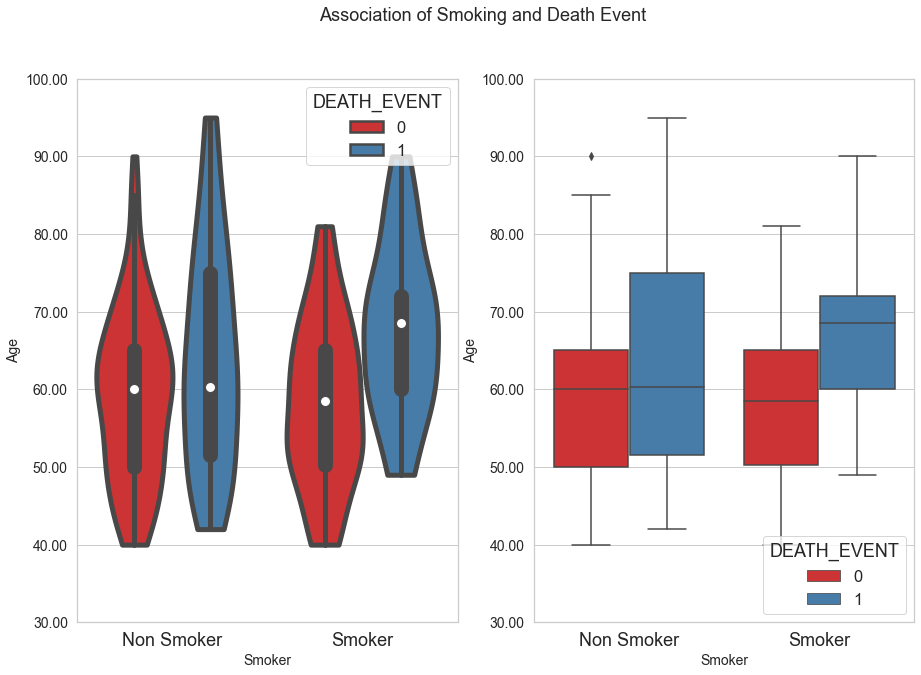

In [16]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of Smoking and Death Event', fontsize=18)
x='smoking'
xlabel='Smoker'
xticks=['Non Smoker', 'Smoker']
y='age'
yticks = ['30', '40', '50', '60', '70', '80', '90', '100']
ylabel='Age'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)

b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18);
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14);

#### -- iv.  Distribution of serum creatinine and death event by gender

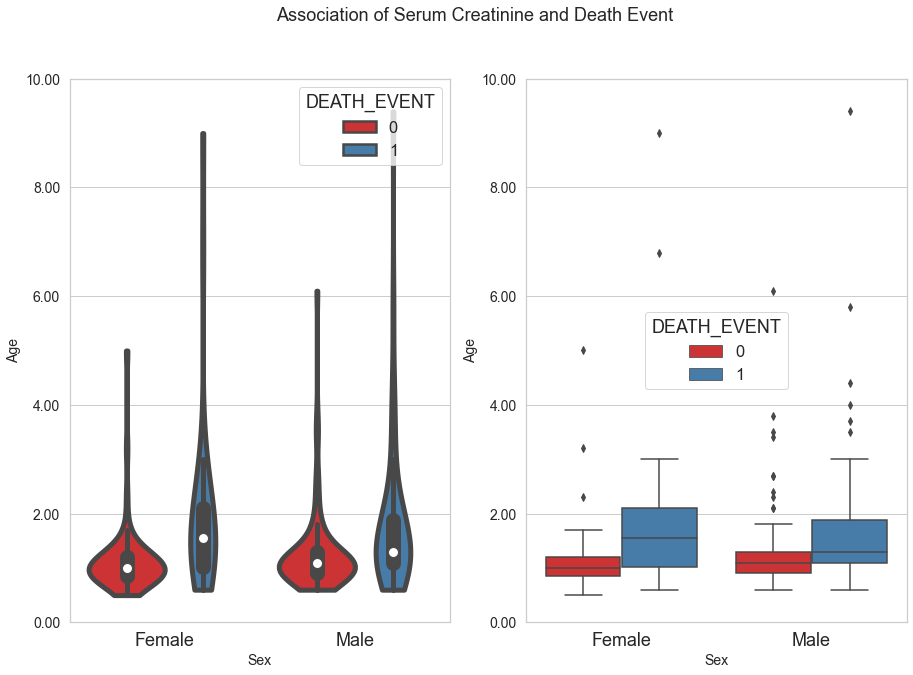

In [17]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of Serum Creatinine and Death Event', fontsize=18)
x='sex'
xlabel='Sex'
xticks=['Female', 'Male']
y='serum_creatinine'
ylabel='Age'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)

b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18);
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14);

#### -- v.  Distribution of high blood pressure by death event and age

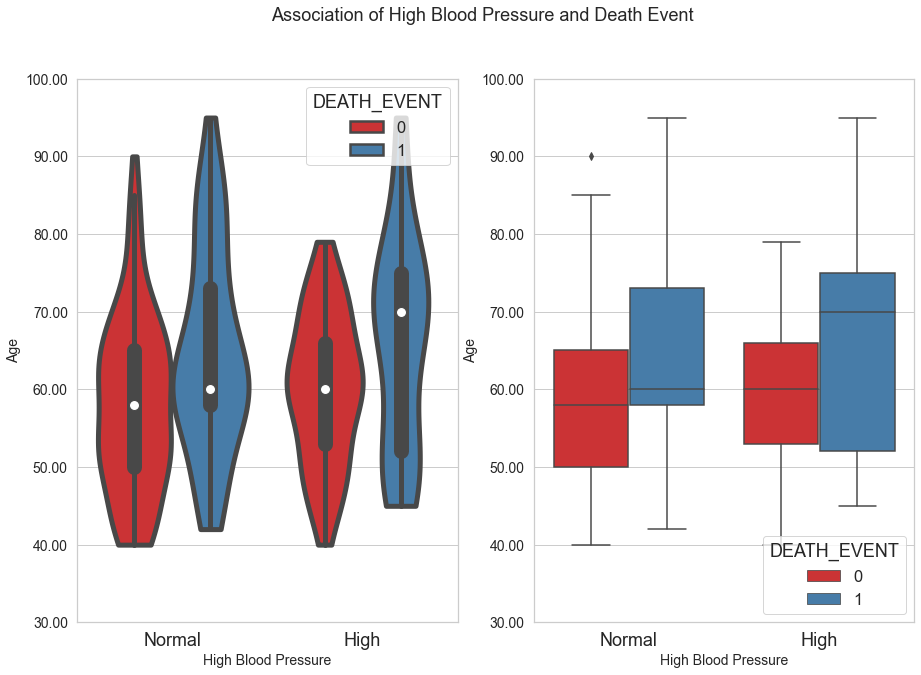

In [18]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of High Blood Pressure and Death Event', fontsize=18)
x='high_blood_pressure'
xlabel='High Blood Pressure'
xticks=['Normal', 'High']
y='age'
ylabel='Age'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)

b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18);
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14);

#### -- vi. Distribution of serum sodium by death event and gender

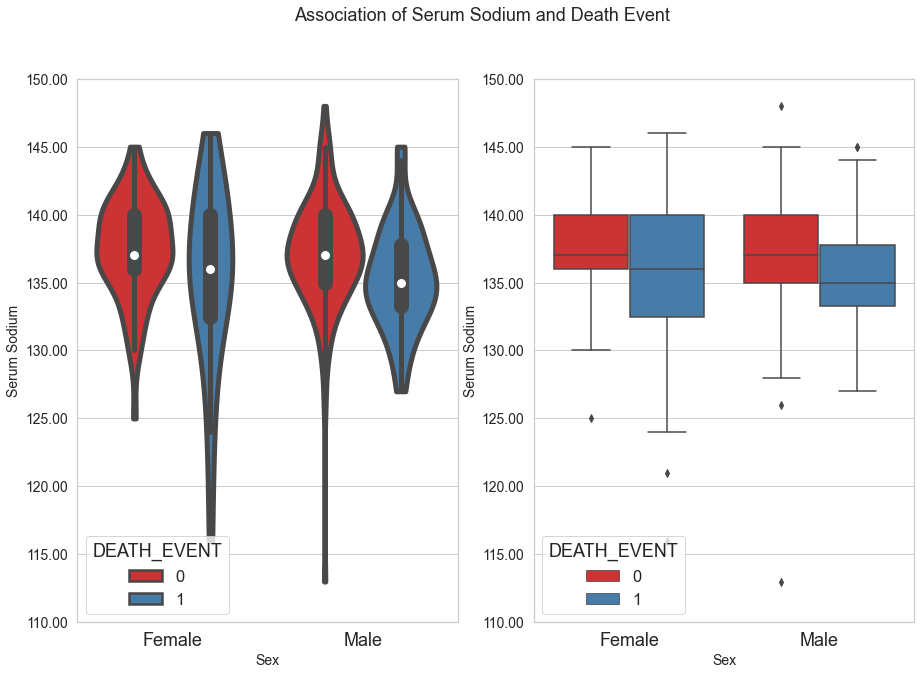

In [19]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of Serum Sodium and Death Event', fontsize=18)
x='sex'
xlabel='Sex'
xticks=['Female', 'Male']
y='serum_sodium'
ylabel='Serum Sodium'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)

b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18);
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14);

#### -- vii. Distribution of anaemia by death event and age

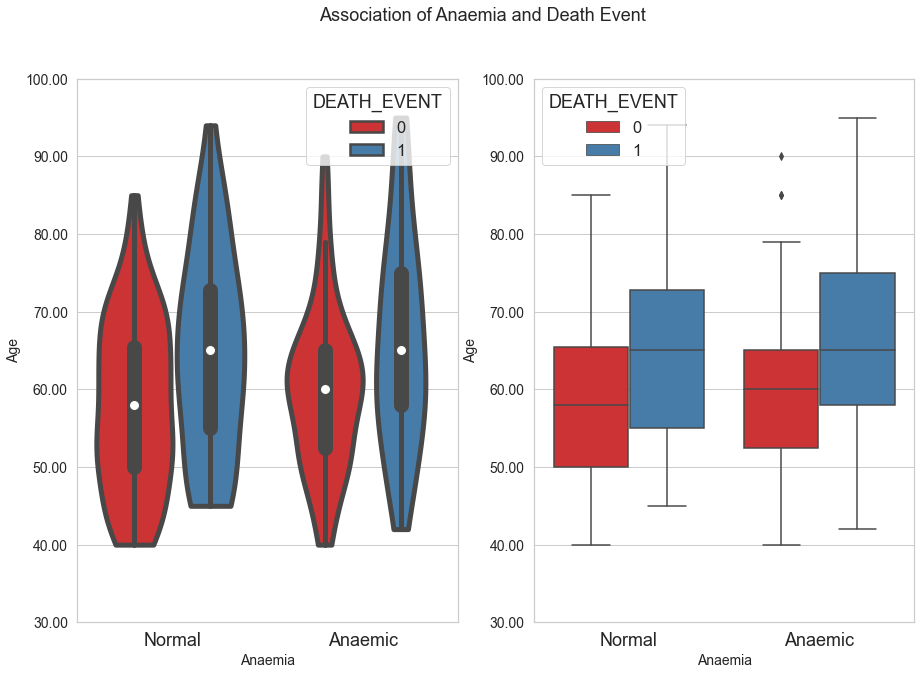

In [20]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of Anaemia and Death Event', fontsize=18)
x='anaemia'
xlabel='Anaemia'
xticks=['Normal', 'Anaemic']
y='age'
ylabel='Age'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)

b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18);
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14);

#### -- viii. Distribution of creatinine phosphokinase by death event and gender

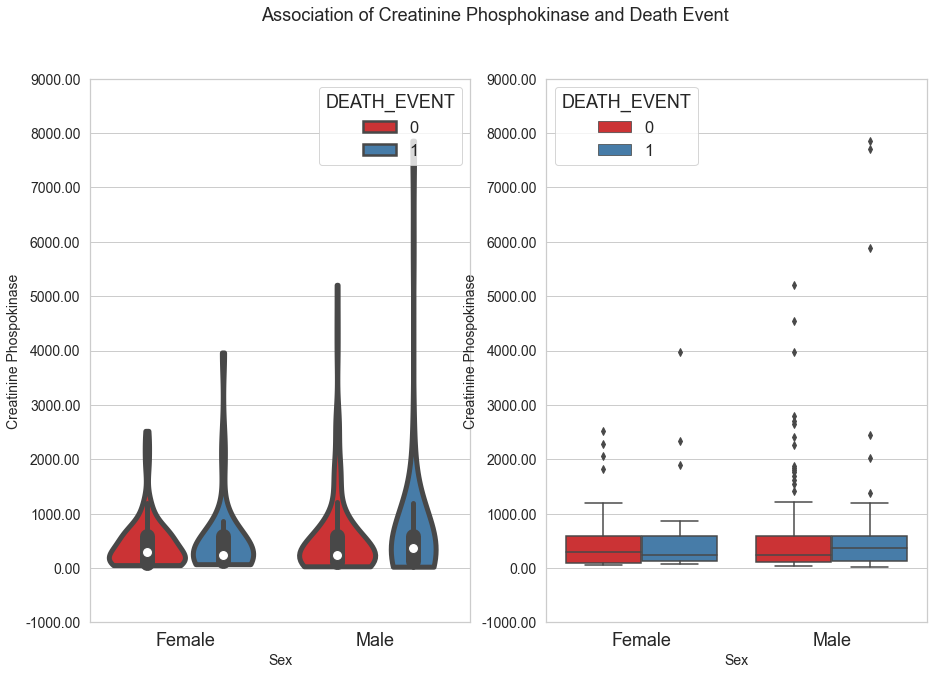

In [21]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of Creatinine Phosphokinase and Death Event', fontsize=18)
x='sex'
xlabel='Sex'
xticks=['Female', 'Male']
y='creatinine_phosphokinase'
ylabel='Creatinine Phospokinase'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)

b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18);
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14);

#### -- ix. Distribution of ejection fraction and death event by gender

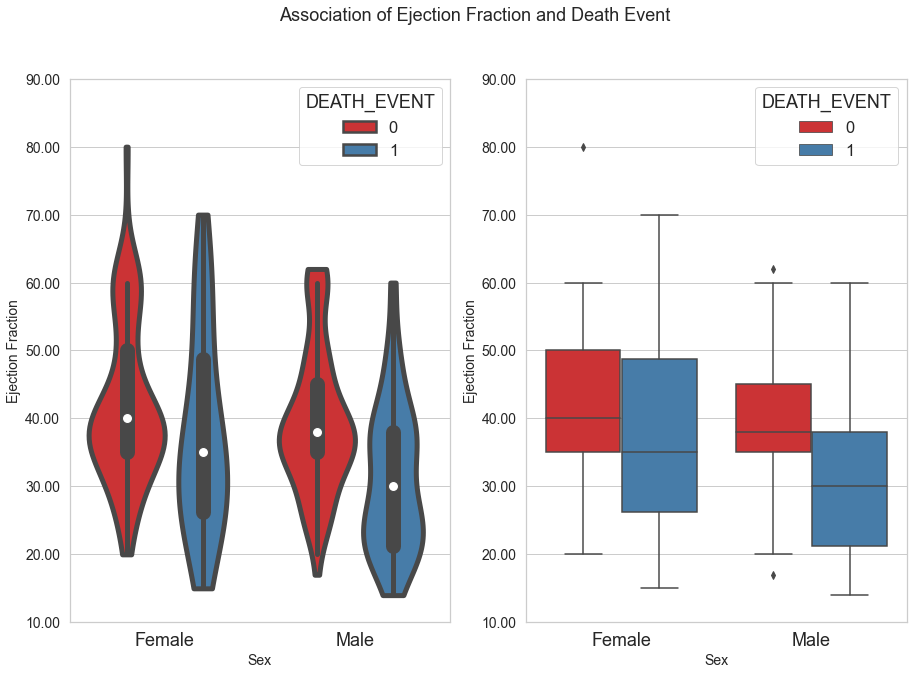

In [22]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))

# Oragnize data and labels
fig.suptitle('Association of Ejection Fraction and Death Event', fontsize=18)
x='sex'
xlabel='Sex'
xticks=['Female', 'Male']
y='ejection_fraction'
ylabel='Ejection Fraction'
hue='DEATH_EVENT'

# Create a violin plot and a box plot of our variable
v = sns.violinplot(ax=axes[0], x=x, y=y, hue=hue, data=heart_data, cut = 0, linewidth=5, palette='Set1')
b = sns.boxplot(ax=axes[1], x=x, y=y, hue=hue, data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel(ylabel, fontsize=14)
v.set_xlabel(xlabel, fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)

b.set_ylabel(ylabel, fontsize=14)
b.set_xlabel(xlabel, fontsize=14)
b.set_xticklabels(xticks, fontsize=18);
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14);

# 4. Exploration of ejection fraction  

Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction. An ejection fraction of 60 percent means that 60 percent of the total amount of blood in the left ventricle is pushed out with each heartbeat.  

### a. What’s normal?
A normal heart’s ejection fraction may be between 50 and 70 percent.  
You can have a normal ejection fraction measurement and still have heart failure  
(called HFpEF or heart failure with preserved ejection fraction).  
  
If the heart muscle has become so thick and stiff that the ventricle holds a smaller than usual volume of blood, it might still seem to pump out a normal percentage of the blood that enters it. In reality, though, the total amount of blood pumped isn’t enough to meet your body’s needs.

### b. Correlation between serum sodium levels and ejection fraction  
Because ejection fraction is so important we decided to test the correlation between serum sodium levels and ejection fraction.    
A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L). Hyponatremia occurs when the sodium in your blood falls below 135 mEq/L.

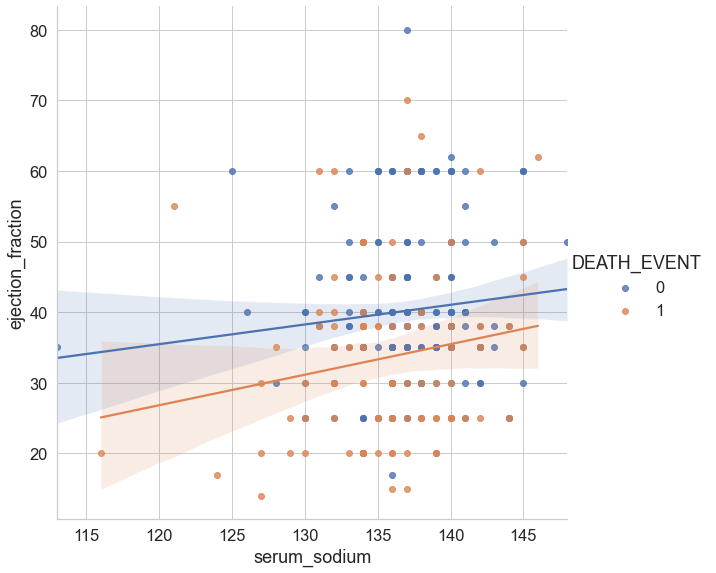

In [23]:
sns.lmplot(data=heart_data, x='serum_sodium', y='ejection_fraction', height=8, aspect=1, hue='DEATH_EVENT');

#### Correlation  
The correlation between serum sodium levels is clear, low serum sodium levels correlates with a low ejection fraction.  
The question is one of causation. Does low serum sodium __cause__ a low ejection fraction or is it vice versa?

### c. Correlation between serum sodium and death event

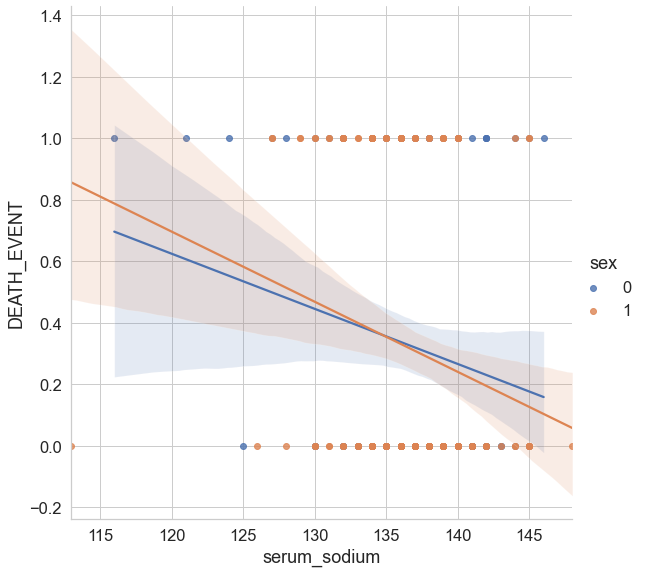

In [24]:
sns.lmplot(x='serum_sodium', y='DEATH_EVENT', hue='sex', data=heart_data, height=8, aspect=1);

### d. Correlation between ejection fraction and death event

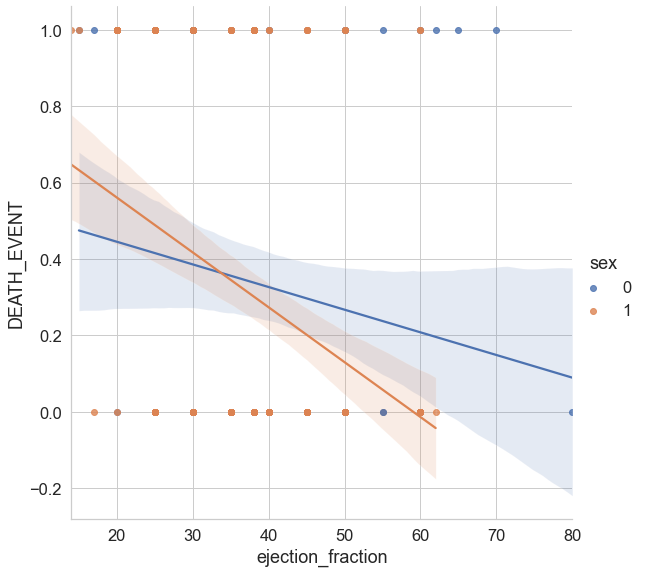

In [25]:
sns.lmplot(x='ejection_fraction', y='DEATH_EVENT', hue='sex', data=heart_data, height=8, aspect=1);

### e. Correlation between serum creatinine and death event

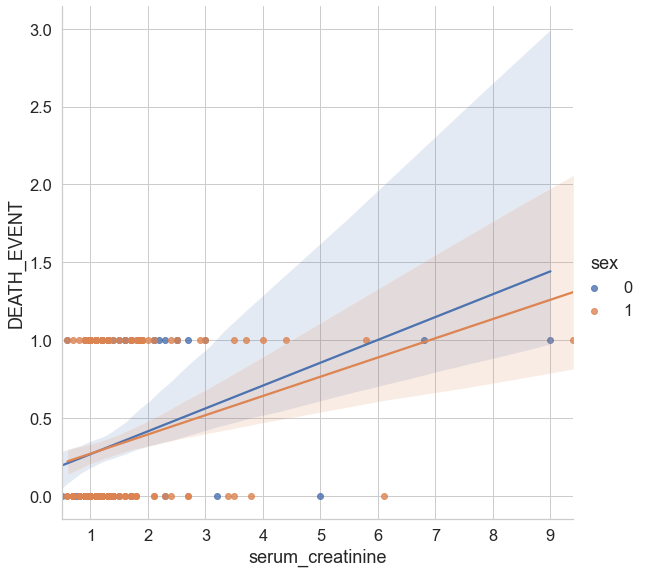

In [26]:
sns.lmplot(x='serum_creatinine', y='DEATH_EVENT', hue='sex', data=heart_data, height=8, aspect=1);

### f. Correlation between ejection fraction and smoking

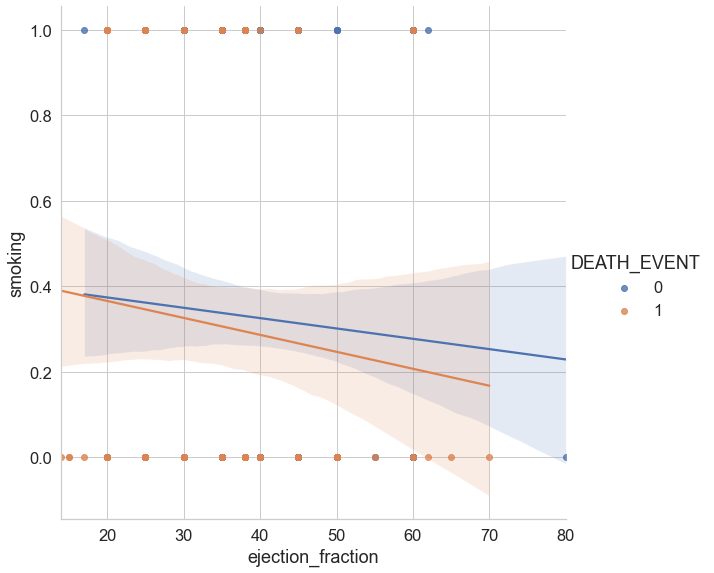

In [27]:
sns.lmplot(x='ejection_fraction', y='smoking', data=heart_data, height=8, aspect=1, hue='DEATH_EVENT');

### g. Correlation between ejection fraction and platelets

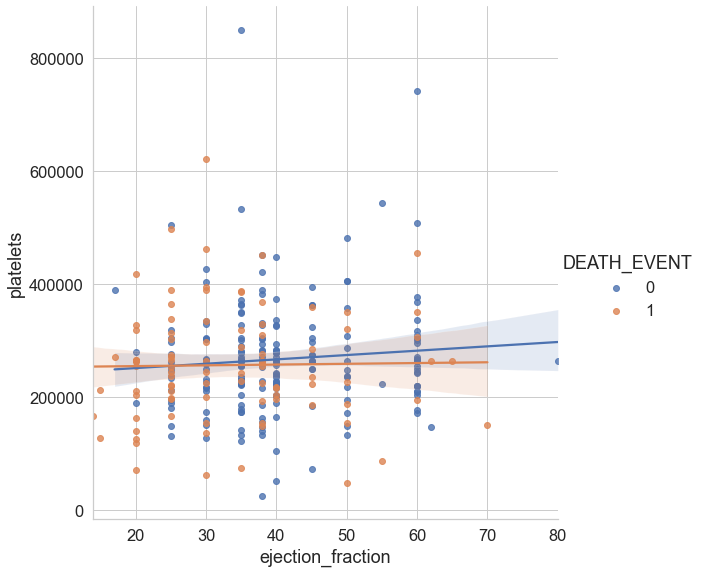

In [28]:
sns.lmplot(x='ejection_fraction', y='platelets', data=heart_data, height=8, aspect=1, hue='DEATH_EVENT');

### h. Correlation between ejection fraction and creatinine phosphokinase

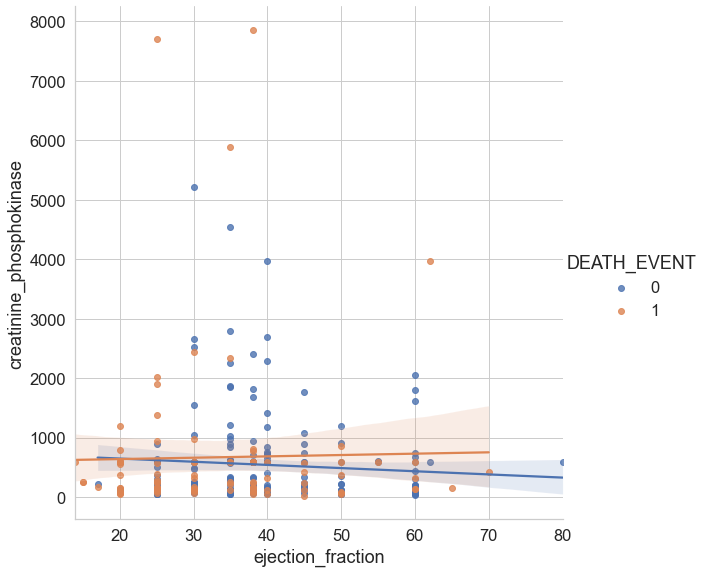

In [29]:
sns.lmplot(x='ejection_fraction', y='creatinine_phosphokinase', data=heart_data, height=8, aspect=1, hue='DEATH_EVENT');

### i. Correlation between ejection fraction and serum creatinine

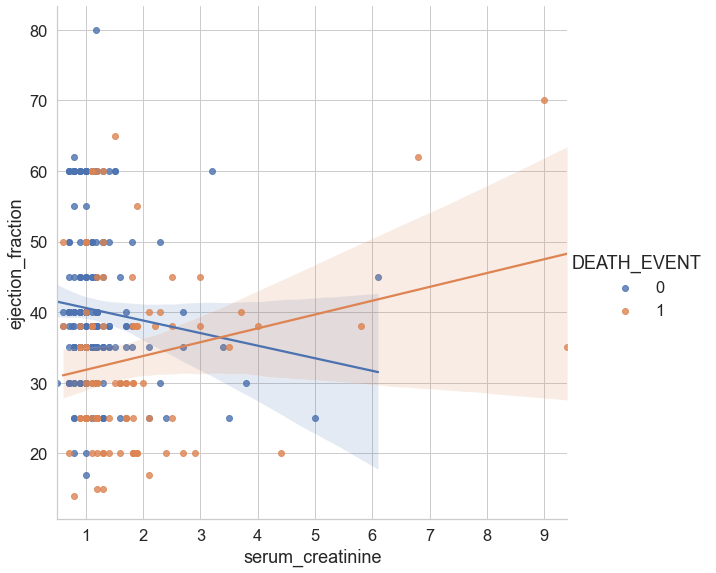

In [30]:
sns.lmplot(x='serum_creatinine', y='ejection_fraction', data=heart_data, height=8, aspect=1, hue='DEATH_EVENT');

### j. Correlation between serum creatinine and age

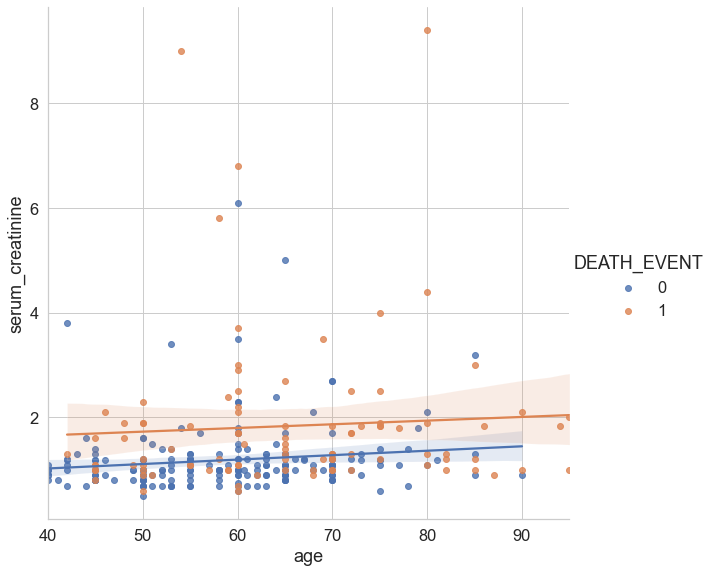

In [31]:
sns.lmplot(x='age', y='serum_creatinine', data=heart_data, height=8, aspect=1, hue='DEATH_EVENT');

# 5. Making a linear regression model between Serum Sodium and Ejection Fraction
### a. Predicting Ejection Fraction based on Serum Sodium

#### -- i. Subset data into X and y data

In [32]:
# Subsetting our data- we are going to try to use serum sodium to predict ejection fraction
X_data = heart_data[['serum_sodium']]
y_data = heart_data[['ejection_fraction']]

#### -- ii. Create train and test split sets, test set 33%

In [33]:
# Train and test split, test size 33%
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33)

#### -- iii. Verify our data shapes

In [34]:
# Check the shape of our data sets
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 1) (200, 1)
(99, 1) (99, 1)


#### -- iv. Instantiate linear regression model and fit to data

In [35]:
rModel = linear_model.LinearRegression(normalize=True)

rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

#### -- v. Use model to make predictions

In [36]:
# Use the model to make predictions
y_pred = rModel.predict(X_test)

#### -- vi. Calculate R Squared value and other metrics

In [37]:
# Evaluate the model by looking at the R-Squared coefficient
print('R^2:', rModel.score(X_train, y_train))
print('This low score shows that our model explains very little of the variability of the response data.\n')
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('The high score indicates a poor fit for our linear regression model.\n')
print('Root Mean Squared Error:', np.sqrt(mse))
print('The high score indicates a poor fit for our linear regression model.\n')
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('The high score indicates a poor fit for our linear regression model.\n')

R^2: 0.028389276696241694
This low score shows that our model explains very little of the variability of the response data.

Mean Squared Error: 147.60490850385068
The high score indicates a poor fit for our linear regression model.

Root Mean Squared Error: 12.149276048549176
The high score indicates a poor fit for our linear regression model.

Mean Absolute Error: 9.567678089946387
The high score indicates a poor fit for our linear regression model.



#### -- vii. Create dataframe of acutal values and predicted values

In [38]:
y_results = y_test
y_results['Pred EF'] = y_pred

<ipython-input-38-12fb0788e399>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_results['Pred EF'] = y_pred


#### -- Viii. Print sample of results data frame

In [39]:
y_results.sample(5)

ejection_fraction    Pred EF
51                  20  38.989378
49                  30  39.446058
252                 45  36.249303
13                  38  38.076020
272                 38  36.249303

#### -- ix. Plot acutal versus predicted ejection fraction

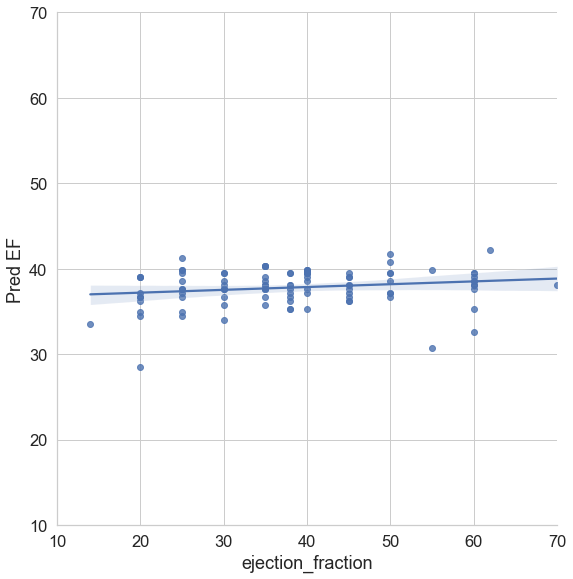

In [40]:
# Plot the predictions agains the actual data

g = sns.lmplot(x='ejection_fraction', y='Pred EF', data=y_results, height=8, aspect=1);
g.set(ylim=(10,70), xlim=(10,70))

#### -- x. Will cross validation improve our results

In [41]:
cv_5 = cross_val_score(rModel, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(cv_5)

[-117.27479856 -191.8242134  -134.77160632 -119.96347201  -89.43772383]


Our previous MSE was 140, so we see very little improvement in only 2 of the tests.

In [42]:
cv_10 = cross_val_score(rModel, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(cv_10)

[-136.68519895 -100.03180475 -189.77239885 -201.15572289 -110.67568242
 -158.00092277 -157.00212702  -81.54527321  -91.75281897  -86.18690551]


Once again the majority of the scores are worse.  
  
These does not seem to be a correlation between ejection fraction and sodium serum.

# 6. Modeling

## a. Model 1: Decision Tree Entropy model - no max_depth

#### -- i. Subset data

In [147]:
# Separate X and y
X = heart_data.drop(['time', 'DEATH_EVENT'], axis='columns')
y = heart_data[['DEATH_EVENT']]

X.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  
0        0  
1        0  
2        1  
3        0  
4        0

#### -- ii. Create train test split

In [148]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

#### -- iii. Instantiate decision tree entropy model

In [149]:
# Instantiate decision tree with entropy model
entropy_model = DecisionTreeClassifier(criterion='entropy', max_depth=None)
entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### -- iv. Use model to make presictions

In [150]:
# Call predict()
y_pred = entropy_model.predict(X_test)
y_pred = pd.Series(y_pred)

#### -- v. Visualize decision tree

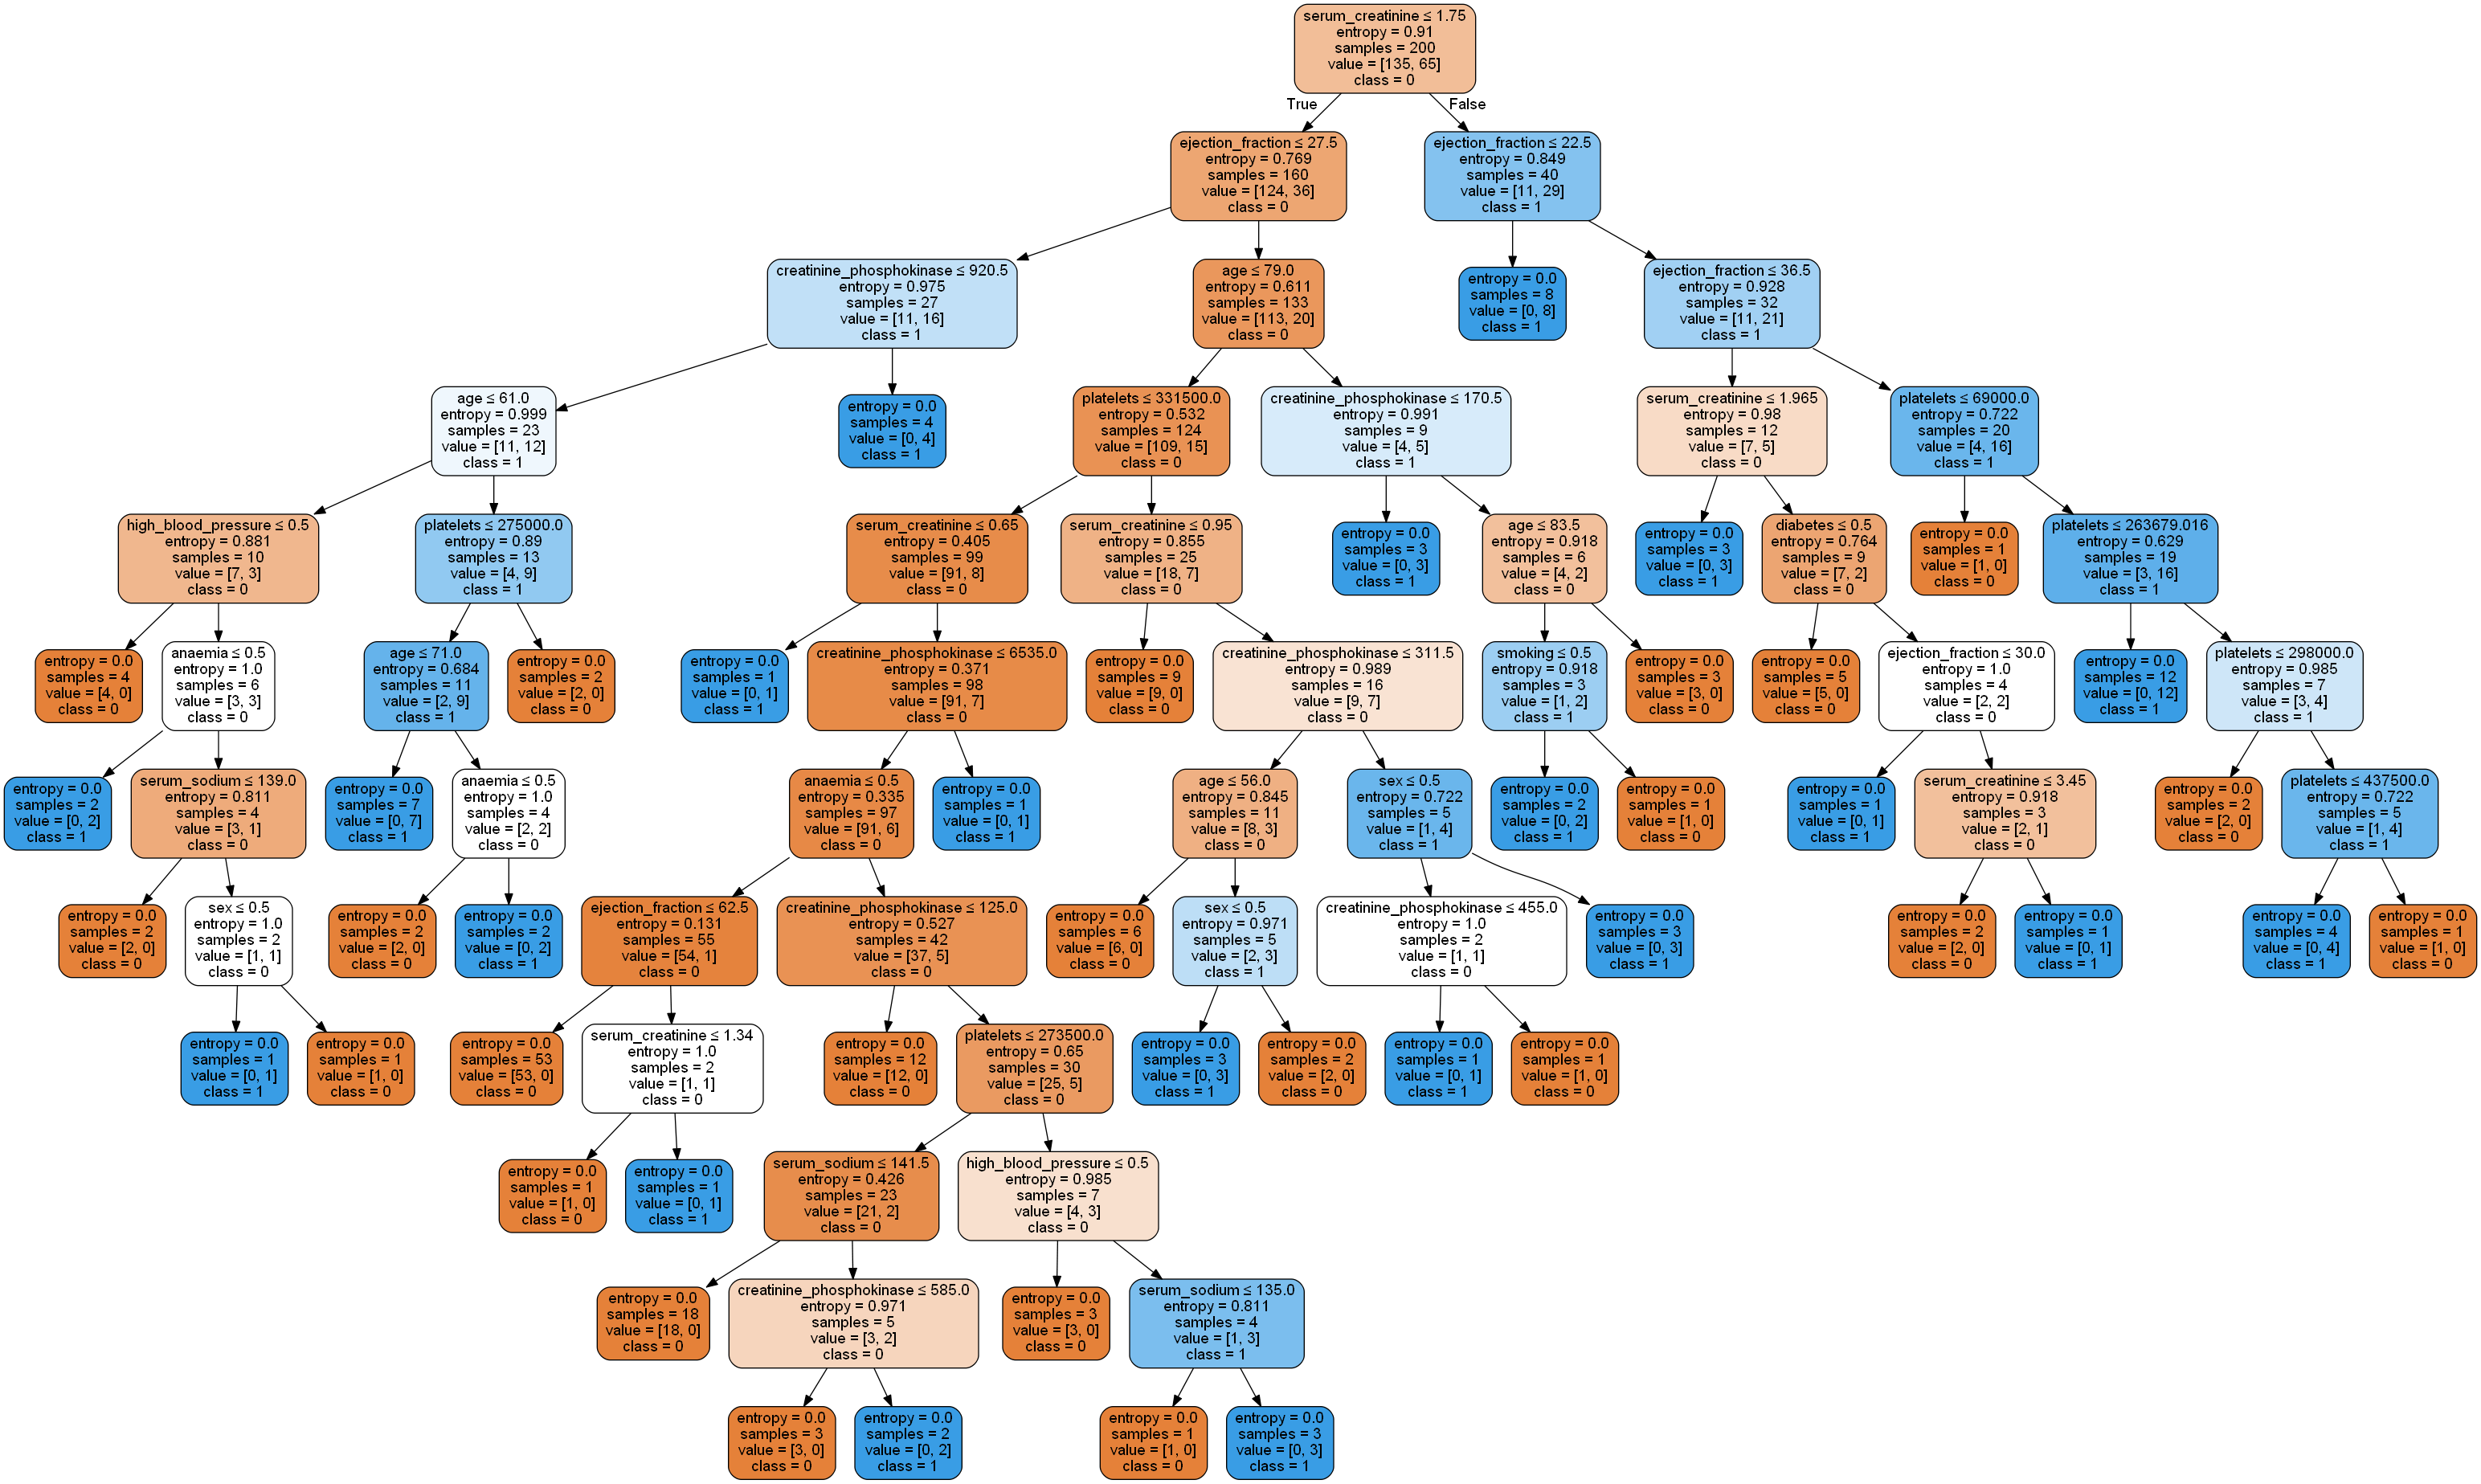

In [151]:
# Visualize the tree
dot_data = StringIO()

tree.export_graphviz(entropy_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns, class_names = ['0', '1']) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### -- vi. Model evaluation metrics

In [152]:
# Model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Model Entropy - no max depth
Accuracy: 0.7070707070707071
Balanced accuracy: 0.6024667931688804
Precision score for "Yes" 0.5555555555555556
Precision score for "No" 0.5555555555555556
Recall score for "Yes" 0.3225806451612903
Recall score for "No" 0.3225806451612903


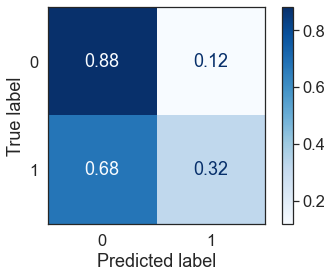

In [155]:
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, plot_roc_curve
sns.set_style('white')
disp = plot_confusion_matrix(entropy_model, X_test, y_test, normalize='true', cmap=plt.cm.Blues)

## b. Model 2: Decision tree gini model

#### -- i. Instantiate decision tree model

In [49]:
# Instantiate the tree wiht the Gini model
gini_model = DecisionTreeClassifier(criterion='gini')

# Call fit()
gini_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### -- ii. Use model to make predictions

In [50]:
# Call predict()
y_pred = gini_model.predict(X_test) 
y_pred = pd.Series(y_pred)

#### -- iii. Visualize decison tree

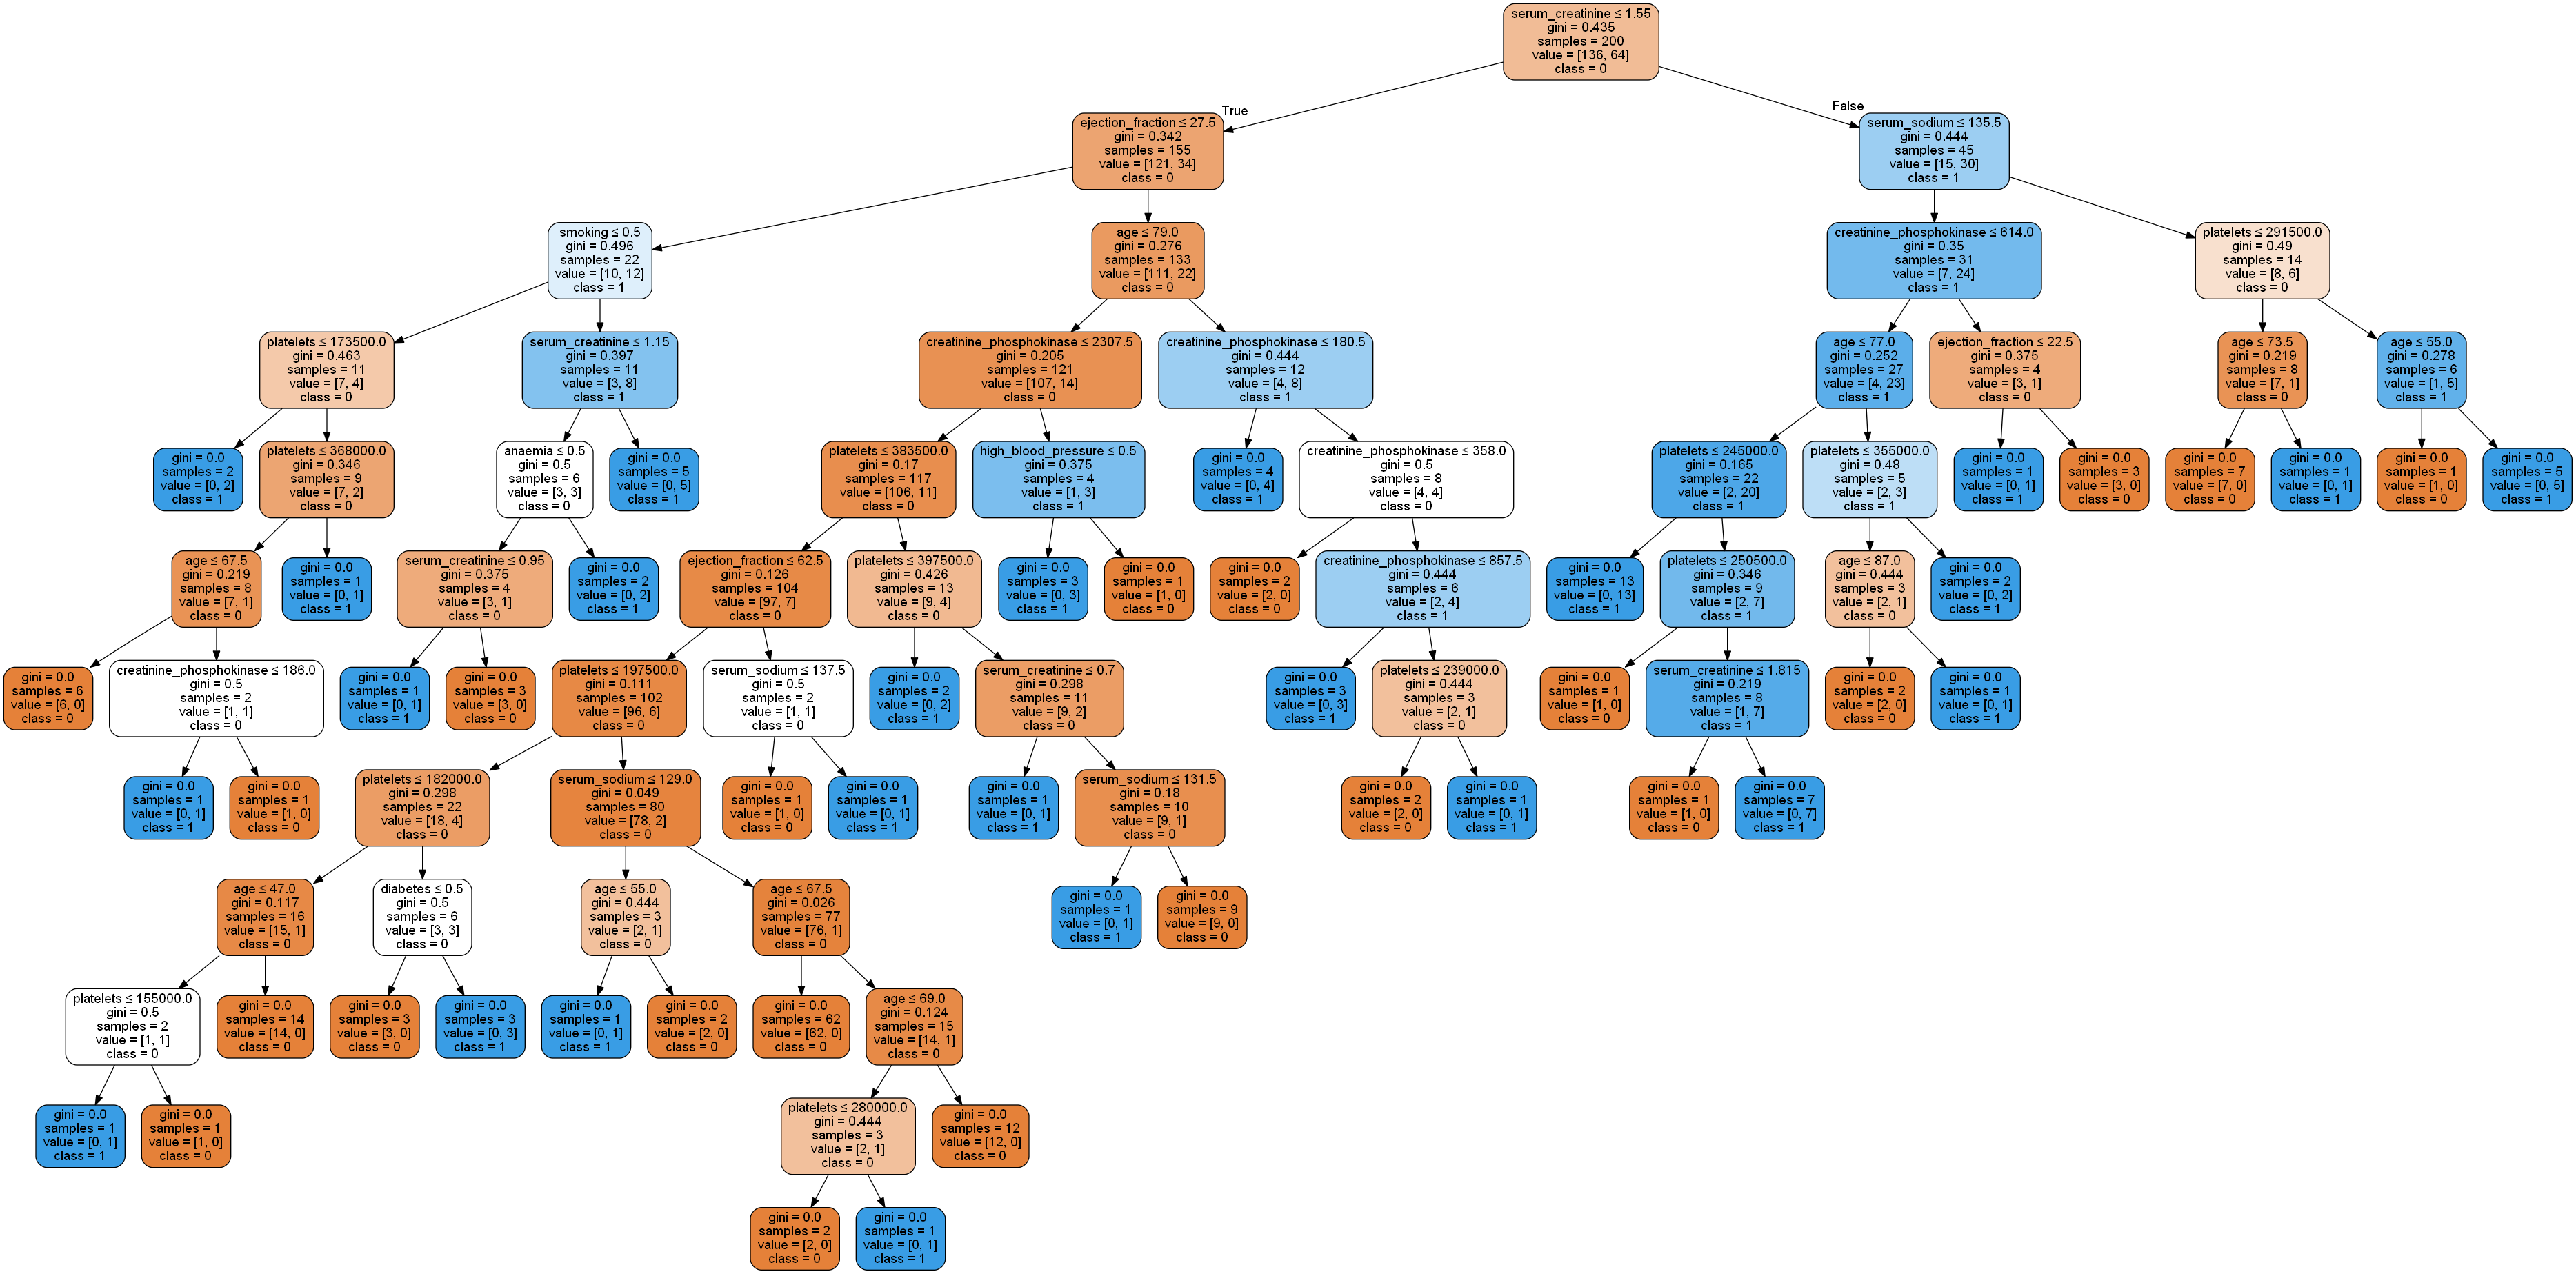

In [51]:
# Visualize the tree
dot_data = StringIO()

tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns, class_names = ['0', '1']) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### -- iv. Model evaluation metrics

In [52]:
# Model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Model Entropy - no max depth
Accuracy: 0.6868686868686869
Balanced accuracy: 0.6298973880597014
Precision score for "Yes" 0.5172413793103449
Precision score for "No" 0.5172413793103449
Recall score for "Yes" 0.46875
Recall score for "No" 0.46875


#### -- v. Conclusion

Our models are not performing well.  
  
We'll try a model with less features.

## c. Model 3: Modeling with less features

#### -- i. Evaluating the features based on covariance

#### Looking back at our covariance matrix, the only features with much covariance at all are:  
  
Age: 0.255  
Ejection Fraction: 0.270  
Serum Creatinine: 0.295  
Serum Sodium: 0.196  


#### -- ii. Subset data

In [53]:
# Separate X and y
X = heart_data[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]
y = heart_data[['DEATH_EVENT']]

X.head()

age  ejection_fraction  serum_creatinine  serum_sodium
0  75.0                 20               1.9           130
1  55.0                 38               1.1           136
2  65.0                 20               1.3           129
3  50.0                 20               1.9           137
4  65.0                 20               2.7           116

#### -- iii. Create train test split

In [54]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

#### -- iv. Instantiate decision tee entropy model

In [55]:
# Instantiate decision tree with entropy model
entropy_model = DecisionTreeClassifier(criterion='entropy', max_depth=None)
entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### -- v. Use model to make predictions

In [56]:
# Call predict()
y_pred = entropy_model.predict(X_test)
y_pred = pd.Series(y_pred)

#### -- vi. Visualize decision tree

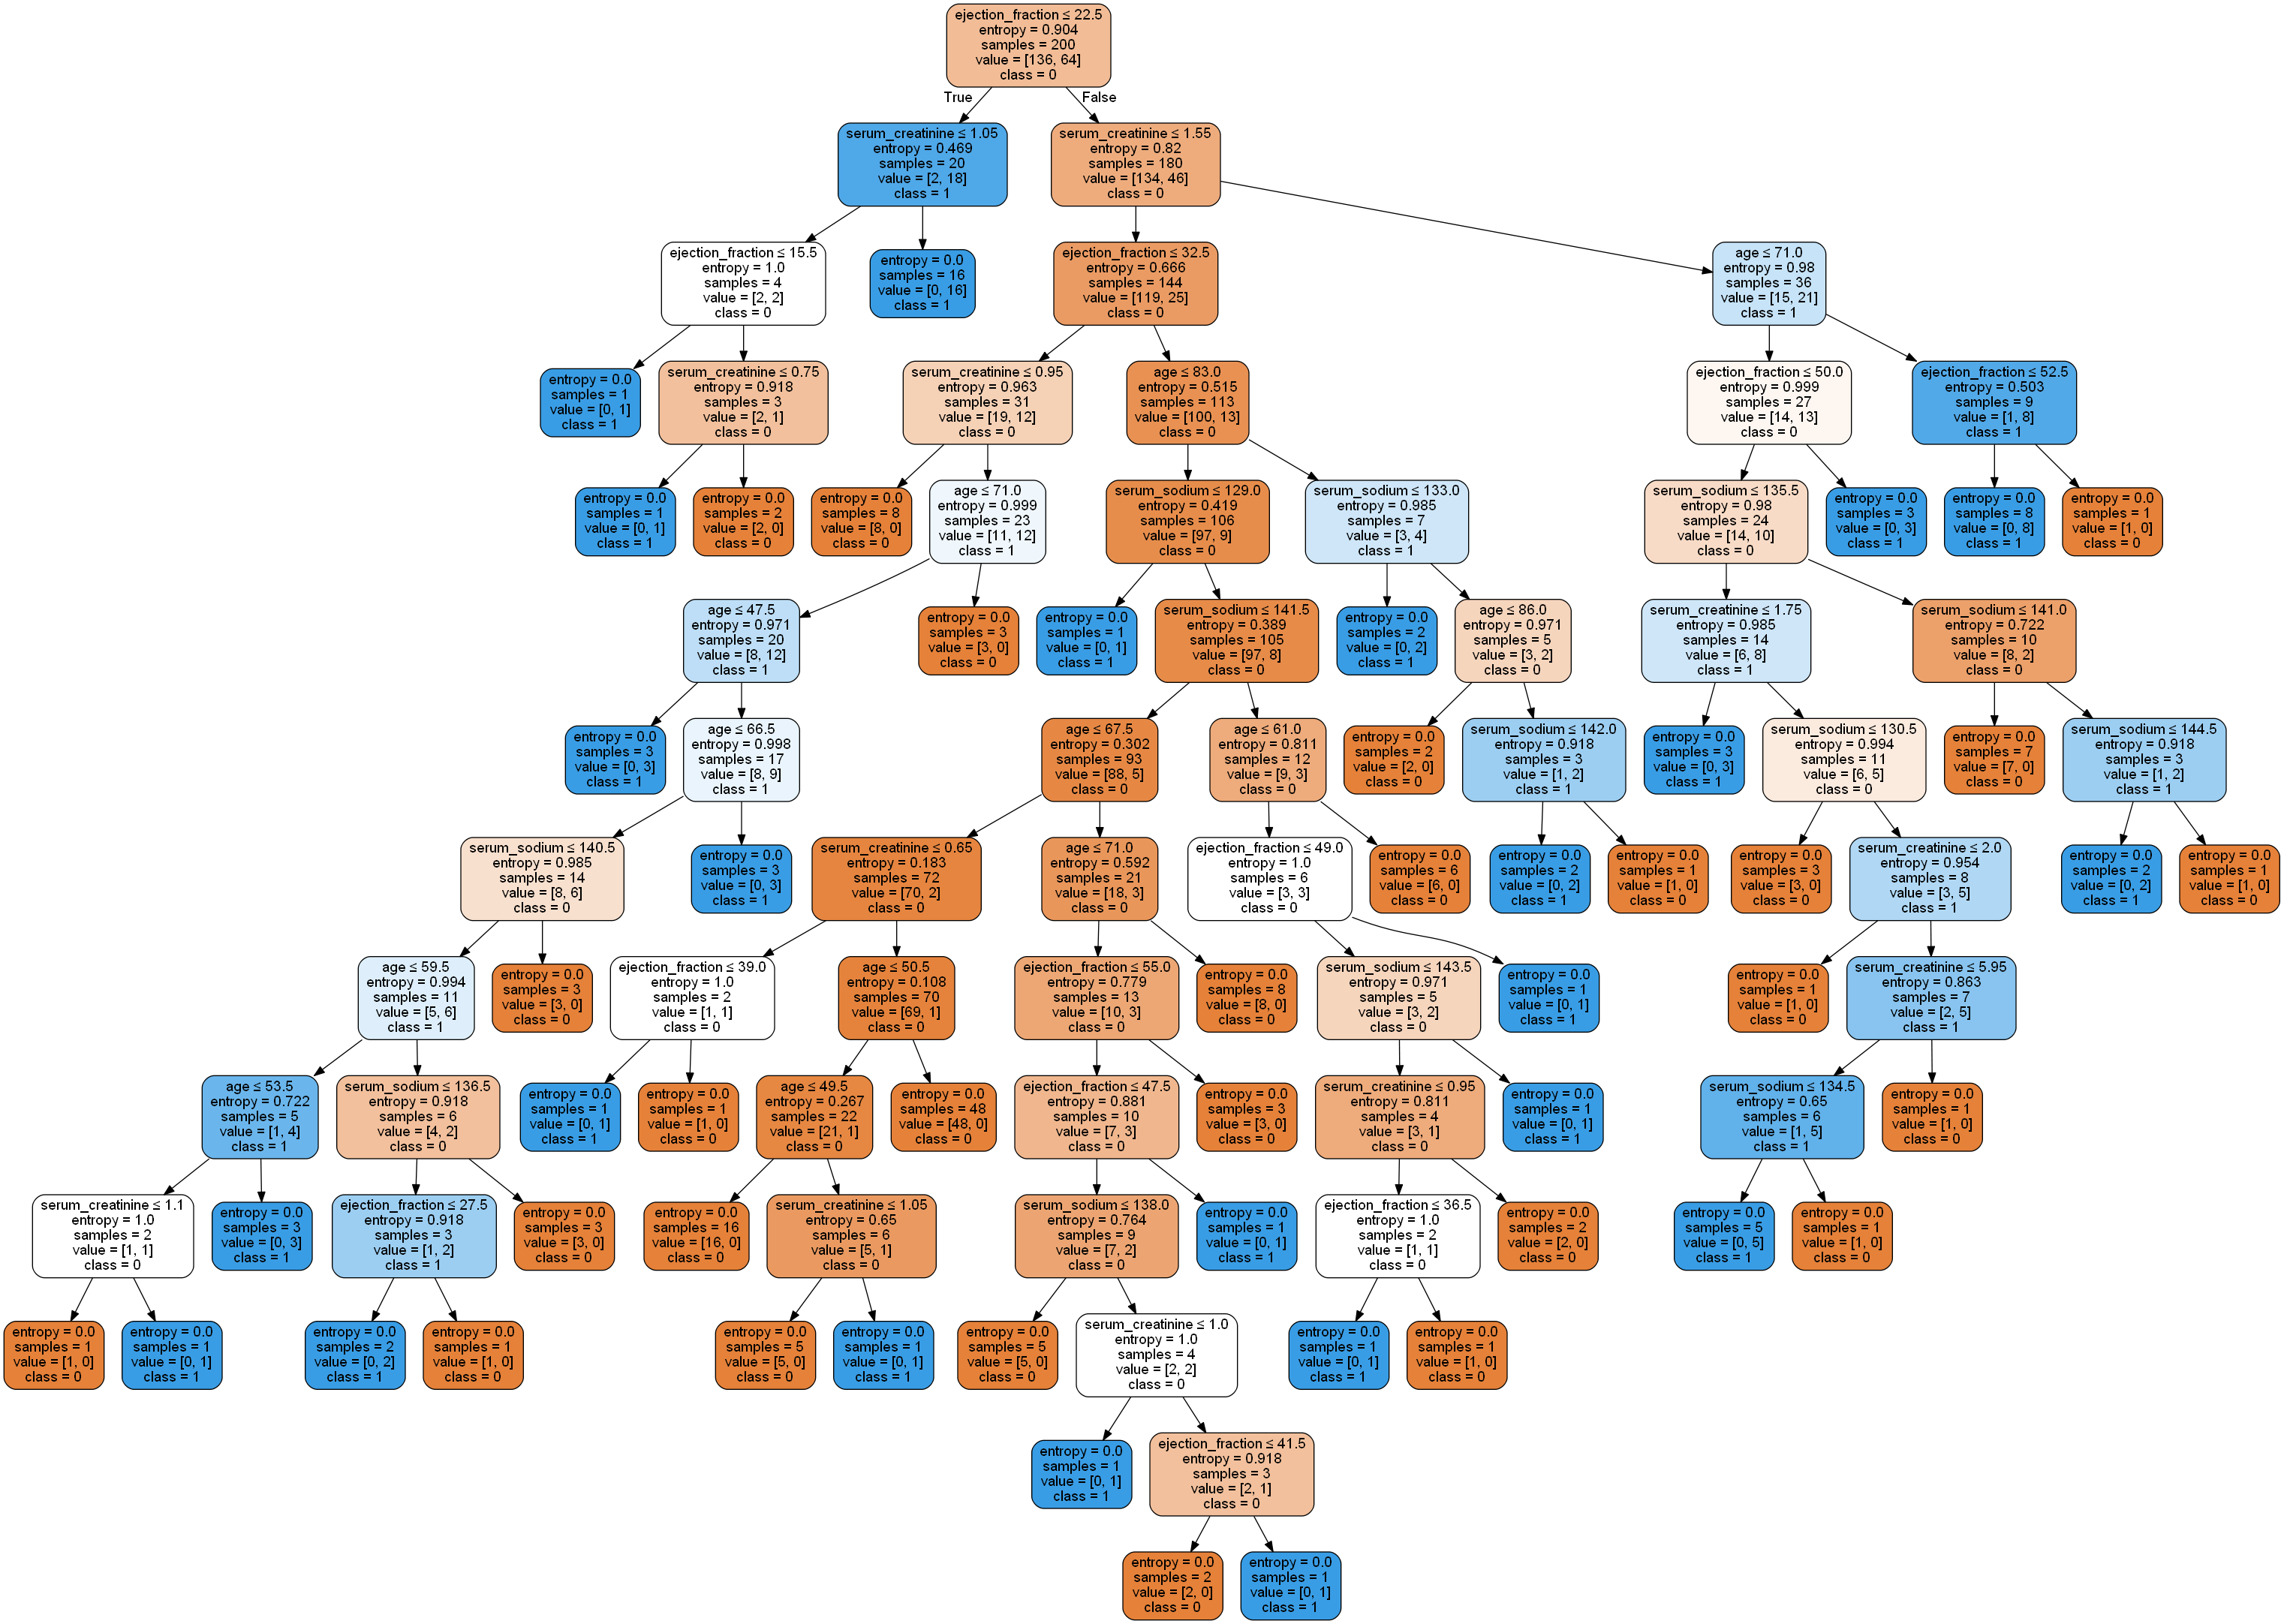

In [57]:
# Visualize the tree
dot_data = StringIO()

tree.export_graphviz(entropy_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns, class_names = ['0', '1']) 

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### -- vii. Model evaluation metrics

In [58]:
# Model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Model Entropy - no max depth
Accuracy: 0.6464646464646465
Balanced accuracy: 0.5755597014925373
Precision score for "Yes" 0.4444444444444444
Precision score for "No" 0.4444444444444444
Recall score for "Yes" 0.375
Recall score for "No" 0.375


#### -- viii. Plot confusion matrix

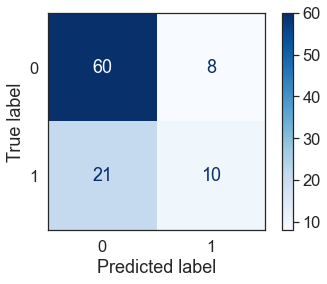

In [161]:
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, plot_roc_curve

sns.set_style('white')
disp = plot_confusion_matrix(entropy_model, X_test, y_test, cmap=plt.cm.Blues)



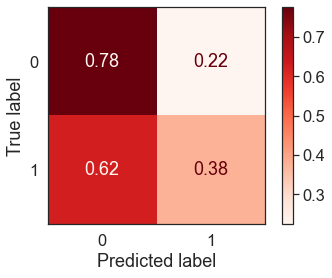

In [60]:
disp = plot_confusion_matrix(entropy_model, X_test, y_test, normalize='true', cmap=plt.cm.Reds)

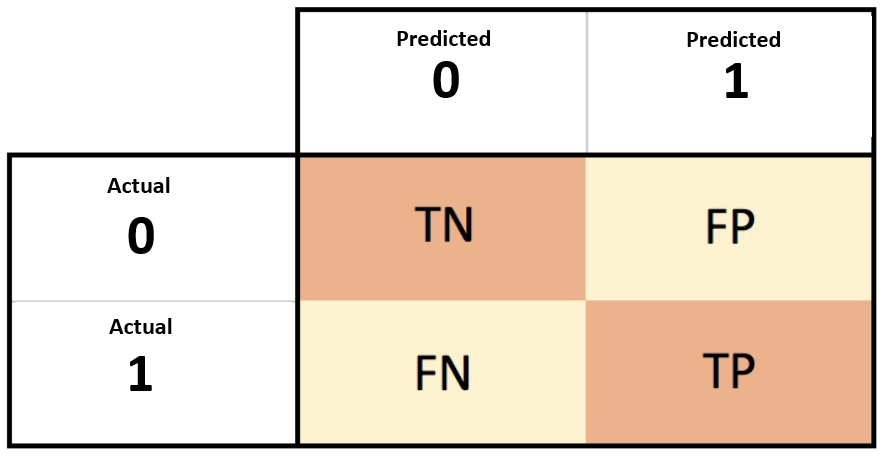

In [61]:
Image(filename='ConfusionMatrix.jpg', width='500')

#### -- ix. Calculate and plot ROC

In [62]:
ras = roc_auc_score(y_test, y_pred)
print('ROC area under the curve:', ras)

ROC area under the curve: 0.5755597014925373


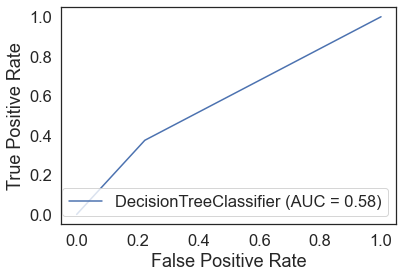

In [63]:

plot_roc_curve(entropy_model, X_test, y_test);


# Random Forest

In [64]:
# Separate X and y
X = heart_data[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]
y = heart_data['DEATH_EVENT']

In [65]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

In [66]:
# Instantiate random forest and fit
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [67]:
# Apply predict
y_pred = rfc.predict(X_test)

In [68]:
# Model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Model Entropy - no max depth
Accuracy: 0.7070707070707071
Balanced accuracy: 0.6893939393939394
Precision score for "Yes" 0.5526315789473685
Precision score for "No" 0.5526315789473685
Recall score for "Yes" 0.6363636363636364
Recall score for "No" 0.6363636363636364


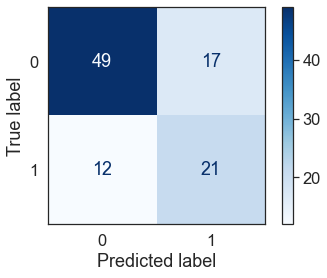

In [69]:
disp = plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)

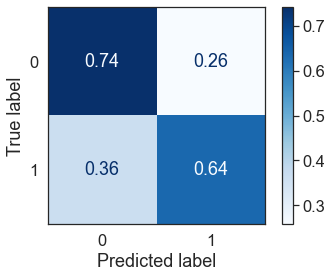

In [70]:
disp = plot_confusion_matrix(rfc, X_test, y_test, normalize='true', cmap=plt.cm.Blues)

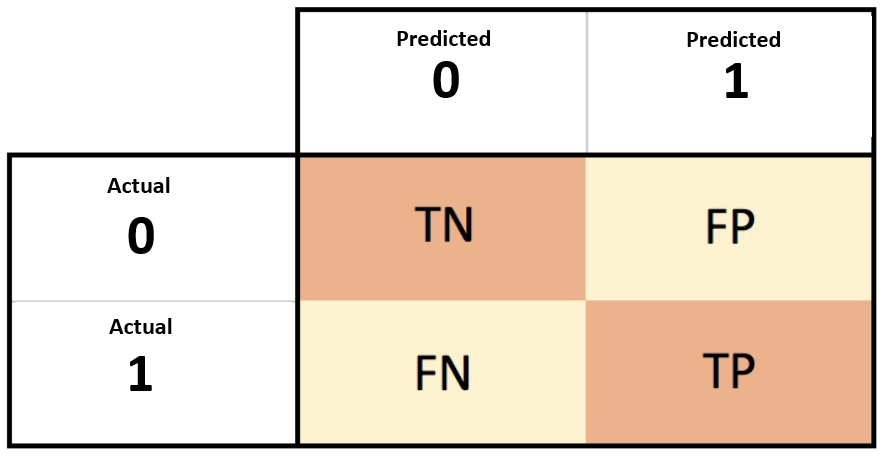

In [71]:
Image(filename='ConfusionMatrix.jpg', width='500')

### i. Correlation between ejection fraction and serum creatinine

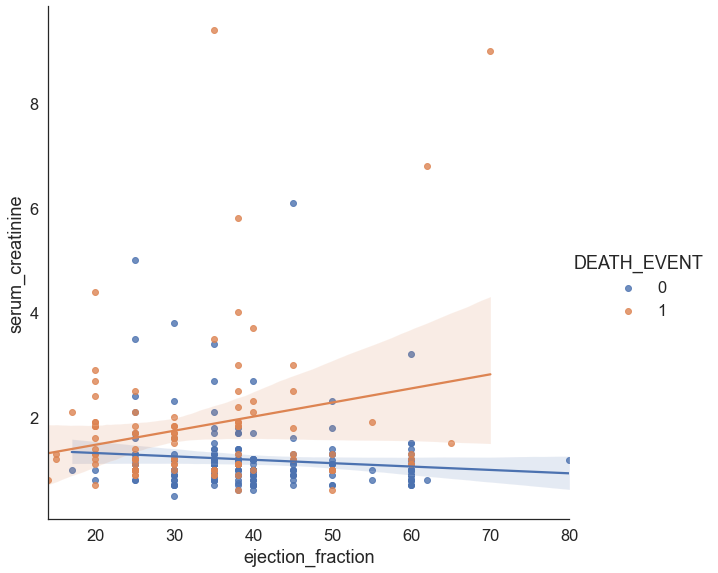

In [72]:
sns.lmplot(x='ejection_fraction', y='serum_creatinine', data=heart_data, height=8, aspect=1, hue='DEATH_EVENT');

#### This is an intersting plot, it clearly shows a correlation between Serum Craatinine and Death Event, regardless of Ejection Fraction

# Random Forest  
## Less Features - Ejection Fraction and Serum Creatinine only

In [73]:
# Separate X and y
X = heart_data[['ejection_fraction', 'serum_creatinine']]
y = heart_data['DEATH_EVENT']

In [74]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [75]:
# Instantiate random forest and fit
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [76]:
# Apply predict
y_pred = rfc.predict(X_test)

In [77]:
# Model evaluation metrics 
print("Random Forest - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Random Forest - no max depth
Accuracy: 0.7575757575757576
Balanced accuracy: 0.683111954459203
Precision score for "Yes" 0.6521739130434783
Precision score for "No" 0.6521739130434783
Recall score for "Yes" 0.4838709677419355
Recall score for "No" 0.4838709677419355


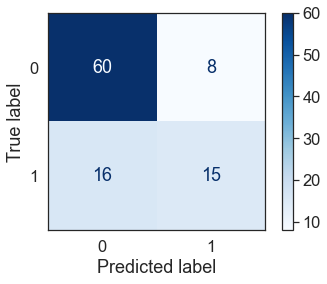

In [78]:
disp = plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)

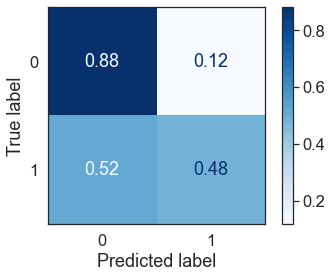

In [79]:
disp = plot_confusion_matrix(rfc, X_test, y_test, normalize='true', cmap=plt.cm.Blues)

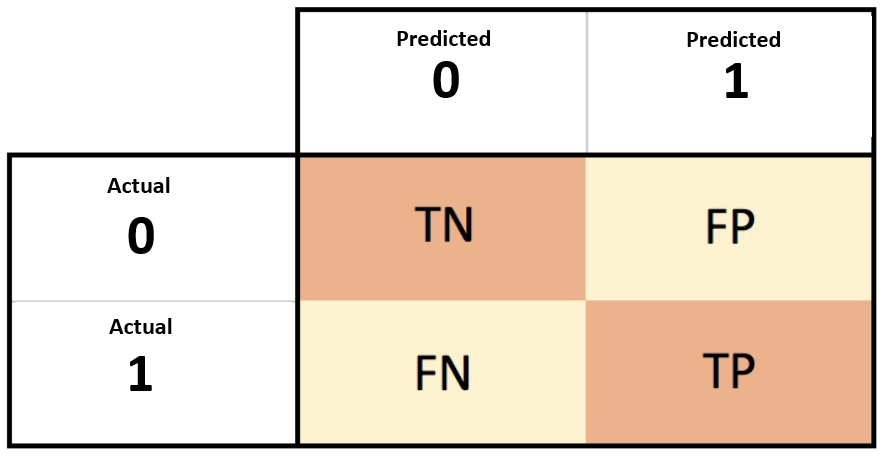

In [80]:
Image(filename='ConfusionMatrix.jpg', width='500')

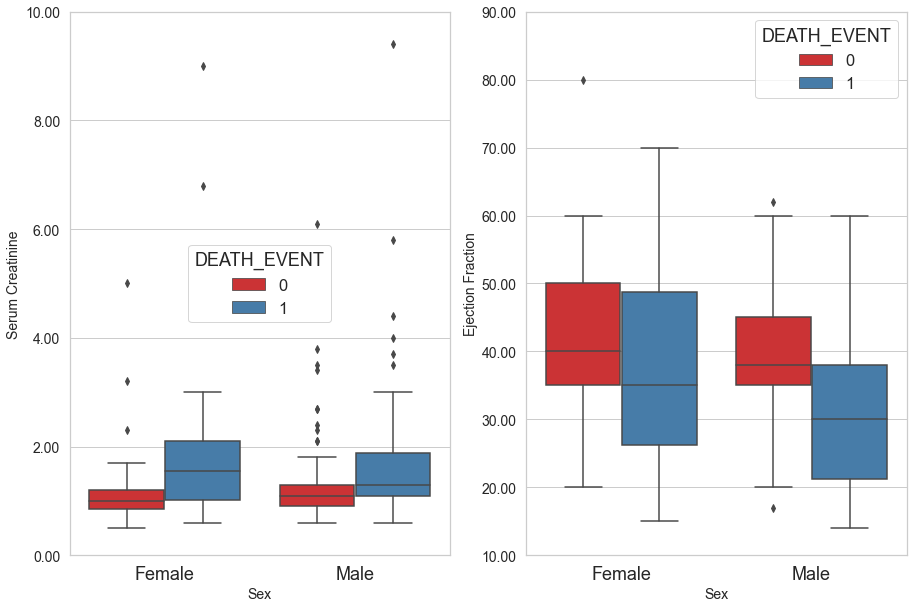

In [81]:
# Set up style, subplots and title
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 2, figsize=(15,10))


# Create a violin plot and a box plot of our variable
v = sns.boxplot(ax=axes[0], x='sex', y='serum_creatinine', hue='DEATH_EVENT', data=heart_data, palette='Set1')
b = sns.boxplot(ax=axes[1], x='sex', y='ejection_fraction', hue='DEATH_EVENT', data=heart_data, palette='Set1')

# Grab tick locations
ticks_loc0 = axes[0].get_yticks().tolist()
yticks0 = ['{:.2f}'.format(x) for x in ticks_loc0]

# Grab tick locations
ticks_loc1 = axes[1].get_yticks().tolist()
yticks1 = ['{:.2f}'.format(x) for x in ticks_loc1]

# Format both plots for readability
v.set_ylabel('Serum Creatinine', fontsize=14)
v.set_xlabel('Sex', fontsize=14)
v.set_xticklabels(xticks, fontsize=18)
v.set_yticks(ticks_loc0)
v.set_yticklabels(yticks0, fontsize=14)

b.set_ylabel('Ejection Fraction', fontsize=14)
b.set_xlabel('Sex', fontsize=14)
b.set_xticklabels(xticks, fontsize=18);
b.set_yticks(ticks_loc1)
b.set_yticklabels(yticks1, fontsize=14);

# Random Forest  
## Less Features - Ejection Fraction and Serum Creatinine only  
## Scaled Features

In [82]:
# Separate X and y
X = heart_data[['ejection_fraction', 'serum_creatinine']]
y = heart_data['DEATH_EVENT']

In [83]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
X_test_scaled.mean()

0.1728919669475692

In [86]:
X_test_scaled.std()

1.3195614381150365

In [87]:
# Instantiate random forest and fit
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=10)

In [88]:
# Apply predict
y_pred = rfc.predict(X_test_scaled)

In [89]:
# Model evaluation metrics 
print("Random Forest - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Random Forest - no max depth
Accuracy: 0.7373737373737373
Balanced accuracy: 0.7348484848484849
Precision score for "Yes" 0.5853658536585366
Precision score for "No" 0.5853658536585366
Recall score for "Yes" 0.7272727272727273
Recall score for "No" 0.7272727272727273


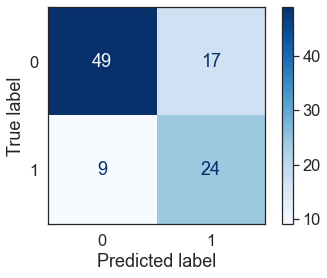

In [90]:
sns.set_style('white')
disp = plot_confusion_matrix(rfc, X_test_scaled, y_test, cmap=plt.cm.Blues)

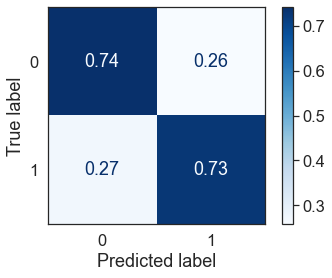

In [91]:
disp = plot_confusion_matrix(rfc, X_test_scaled, y_test, normalize='true', cmap=plt.cm.Blues)

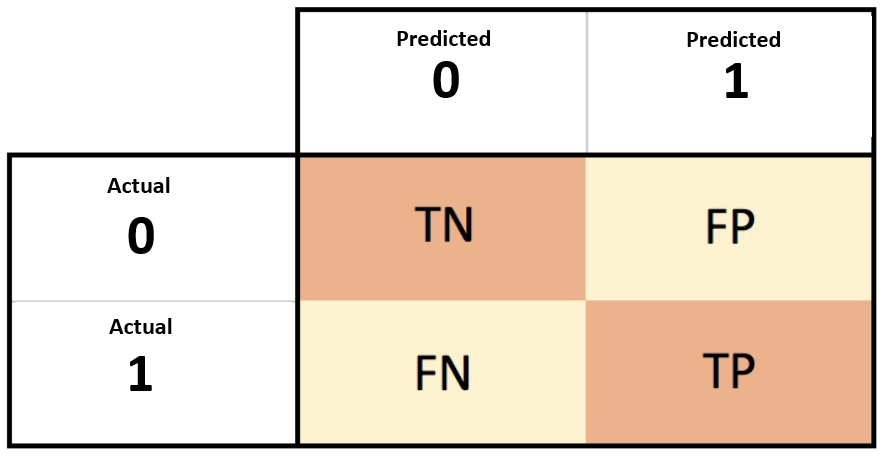

In [92]:
Image(filename='ConfusionMatrix.jpg', width='500')

# PCA  of all 12 features

We're going to apply PCA to try to determine how  many features we should be looking at.

In [93]:
from sklearn.decomposition import PCA

# Create matrix
x_cols = heart_data.drop('DEATH_EVENT', axis=1)
x_cols.shape

(299, 12)

In [94]:
x_pca = PCA(n_components=12, random_state=10).fit(x_cols)

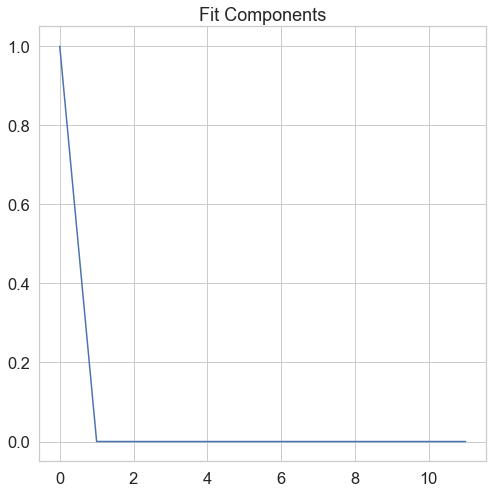

In [95]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
plt.title('Fit Components')
plt.plot(x_pca.explained_variance_ratio_);

# Random Forest with only 3 features
## Features scaled

In [96]:
# Separate X and y
X = heart_data[['ejection_fraction', 'serum_creatinine', 'time']]
y = heart_data['DEATH_EVENT']

In [97]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

In [98]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
X_test_scaled.mean()

0.1255924256337007

In [100]:
X_test_scaled.std()

1.213179388254497

In [101]:
# Instantiate random forest and fit
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=10)

In [102]:
# Apply predict
y_pred = rfc.predict(X_test_scaled)

In [103]:
# Model evaluation metrics 
print("Random Forest - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Random Forest - no max depth
Accuracy: 0.8484848484848485
Balanced accuracy: 0.8257575757575757
Precision score for "Yes" 0.78125
Precision score for "No" 0.78125
Recall score for "Yes" 0.7575757575757576
Recall score for "No" 0.7575757575757576


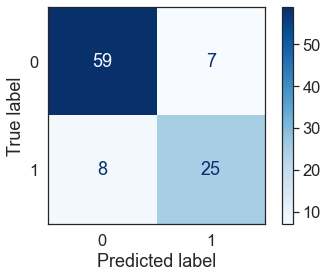

In [104]:
sns.set_style('white')
disp = plot_confusion_matrix(rfc, X_test_scaled, y_test, cmap=plt.cm.Blues)

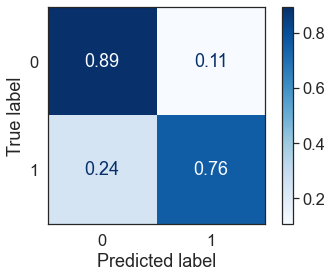

In [105]:
disp = plot_confusion_matrix(rfc, X_test_scaled, y_test, normalize='true', cmap=plt.cm.Blues)

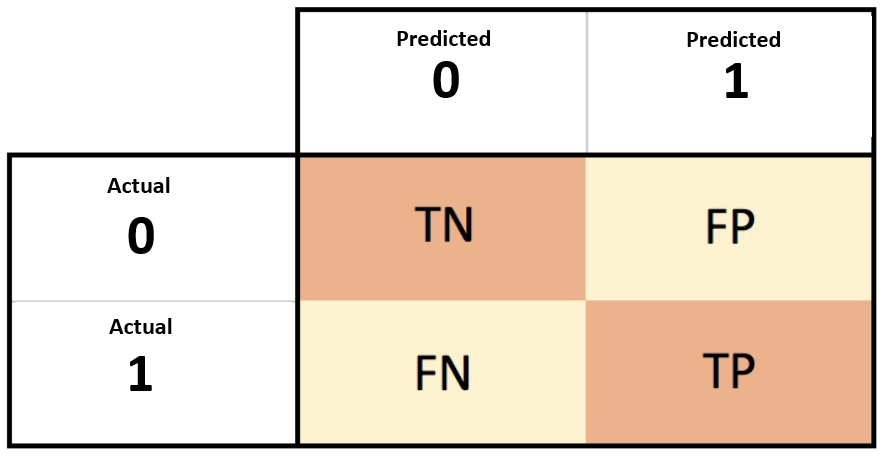

In [106]:
Image(filename='ConfusionMatrix.jpg', width='500')

## Investigate the correlation between the follow up time and death event

In [107]:
timedf = heart_data[['time', 'DEATH_EVENT']]
# timedf = timedf[timedf.DEATH_EVENT != 0]
# timedf.DEATH_EVENT.value_counts()

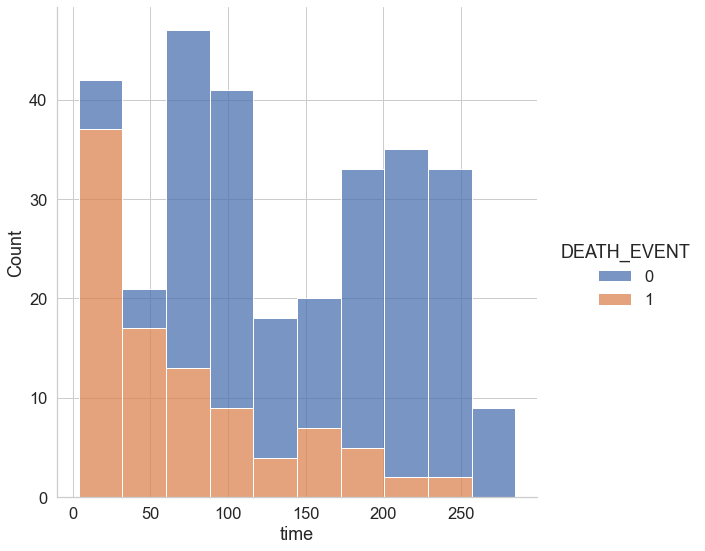

In [108]:
sns.set_style('whitegrid')
sns.displot(timedf, x='time', hue='DEATH_EVENT', multiple='stack', height=8);

#### Perhaps we should run a model with time as the target

# Recursive Feature Selection

In [109]:
X = heart_data.drop('DEATH_EVENT', axis=1)
X1 = heart_data.drop('DEATH_EVENT', axis=1)
y = heart_data['DEATH_EVENT']

In [110]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = scaler.fit_transform(X)

for i in range(1,9):    
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=i )
    rfe_selector.fit(X, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X1.loc[:, rfe_support].columns.tolist()
    print(len(rfe_feature), rfe_feature)

1 ['time']
2 ['ejection_fraction', 'time']
3 ['ejection_fraction', 'serum_creatinine', 'time']
4 ['age', 'ejection_fraction', 'serum_creatinine', 'time']
5 ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
6 ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'sex', 'time']
7 ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'sex', 'time']
8 ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'time']


# Random Forest 4 prime features
## Scaled Data

In [111]:
# Separate X and y
X = heart_data[['age', 'ejection_fraction', 'serum_creatinine', 'time']]
y = heart_data['DEATH_EVENT']

In [112]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

In [113]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
X_test_scaled.mean()

0.0955144674116092

In [115]:
X_test_scaled.std()

1.1711747257342948

In [116]:
# Instantiate random forest and fit
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=10)

In [117]:
# Apply predict
y_pred = rfc.predict(X_test_scaled)

In [118]:
# Model evaluation metrics 
print("Random Forest - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Random Forest - no max depth
Accuracy: 0.797979797979798
Balanced accuracy: 0.7651515151515151
Precision score for "Yes" 0.7096774193548387
Precision score for "No" 0.7096774193548387
Recall score for "Yes" 0.6666666666666666
Recall score for "No" 0.6666666666666666


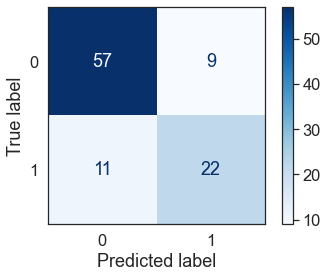

In [119]:
sns.set_style('white')
disp = plot_confusion_matrix(rfc, X_test_scaled, y_test, cmap=plt.cm.Blues)

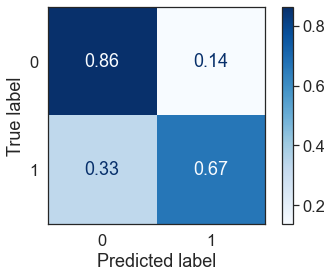

In [120]:
disp = plot_confusion_matrix(rfc, X_test_scaled, y_test, normalize='true', cmap=plt.cm.Blues)

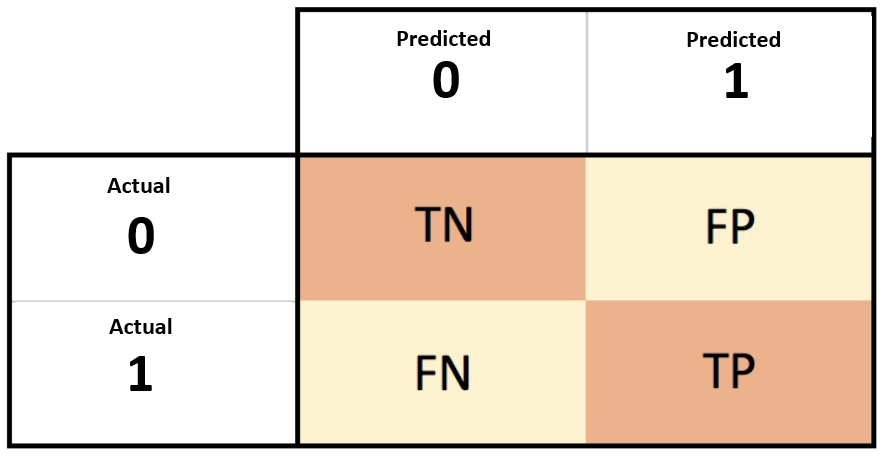

In [121]:
Image(filename='ConfusionMatrix.jpg', width='500')

## Cross Validation Hyperparameter Tuning

In [122]:
X = heart_data.drop('DEATH_EVENT', axis=1)
y = heart_data['DEATH_EVENT']

In [123]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

In [124]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [125]:
# Instantiate RFC
rfc = RandomForestClassifier(random_state=10)

# Propagate RSCV
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, 
                                 n_iter=100, cv=4, verbose=2, random_state=10, n_jobs=-1)

# Fit the model
rfc_random.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.1min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, verbose=2)

In [126]:
rfc_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

## Test run

In [127]:
# Instantiate random forest and fit
rfc = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=2,
                             max_features='sqrt', max_depth=50, bootstrap=True, random_state=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=2,
                       n_estimators=200, random_state=10)

In [128]:
# Apply predict
y_pred = rfc.predict(X_test)

In [129]:
# Model evaluation metrics 
print("Random Forest - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Random Forest - no max depth
Accuracy: 0.8383838383838383
Balanced accuracy: 0.803030303030303
Precision score for "Yes" 0.7931034482758621
Precision score for "No" 0.7931034482758621
Recall score for "Yes" 0.696969696969697
Recall score for "No" 0.696969696969697


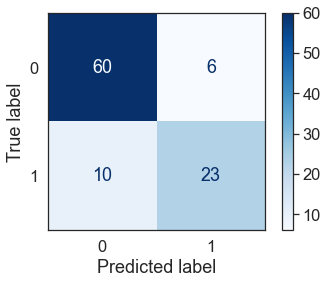

In [130]:
sns.set_style('white')
disp = plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)

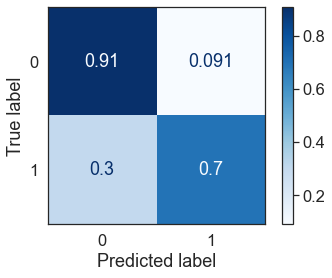

In [131]:
disp = plot_confusion_matrix(rfc, X_test, y_test, normalize='true', cmap=plt.cm.Blues)

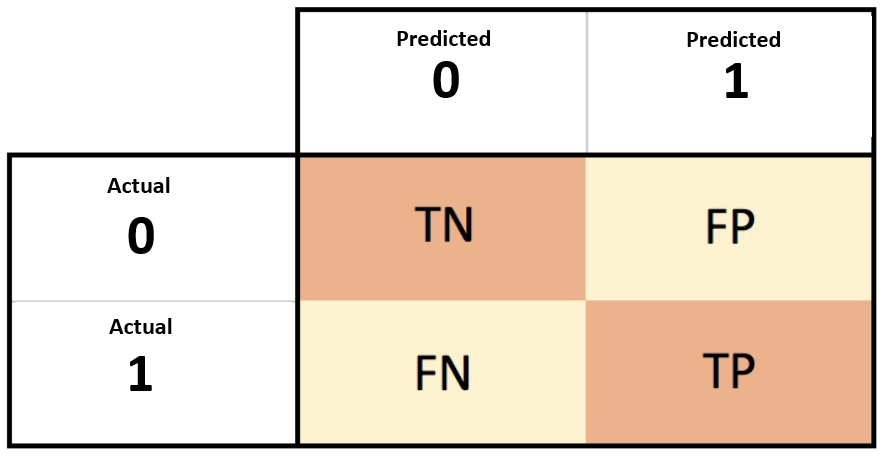

In [132]:
Image(filename='ConfusionMatrix.jpg', width='500')

## Cross Validation Hyperparameter Tuning
### 2 prime features

In [133]:
X = heart_data[['ejection_fraction', 'serum_creatinine']]
y = heart_data['DEATH_EVENT']

In [134]:
# Split the data into test train data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=10)

In [135]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [136]:
# Instantiate RFC
rfc = RandomForestClassifier(random_state=20)

# Propagate RSCV
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=random_grid, 
                                 n_iter=100, cv=4, verbose=2, random_state=10, n_jobs=-1)

# Fit the model
rfc_random.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.0min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=10, verbose=2)

In [137]:
rfc_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

## Test run

In [138]:
# Instantiate random forest and fit
rfc = RandomForestClassifier(n_estimators=1600, min_samples_split=10, min_samples_leaf=4,
                             max_features='sqrt', max_depth=30, bootstrap=True, random_state=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1600,
                       random_state=10)

In [139]:
# Apply predict
y_pred = rfc.predict(X_test)

In [140]:
# Model evaluation metrics 
print("Random Forest - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred));

Random Forest - no max depth
Accuracy: 0.7878787878787878
Balanced accuracy: 0.7803030303030303
Precision score for "Yes" 0.6578947368421053
Precision score for "No" 0.6578947368421053
Recall score for "Yes" 0.7575757575757576
Recall score for "No" 0.7575757575757576


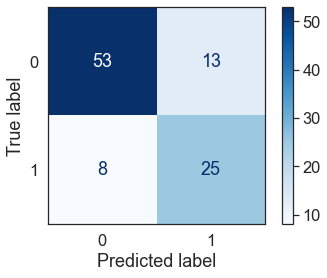

In [141]:
sns.set_style('white')
disp = plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)

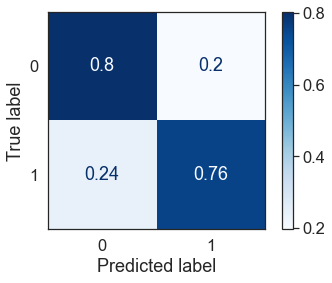

In [142]:
disp = plot_confusion_matrix(rfc, X_test, y_test, normalize='true', cmap=plt.cm.Blues)

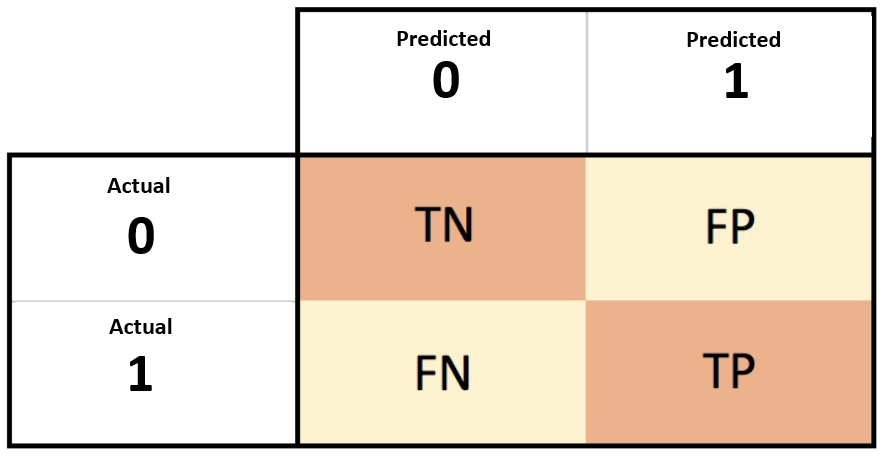

In [143]:
Image(filename='ConfusionMatrix.jpg', width='500')

# Multiple Random Forest Runs for Average

In [162]:
# Import mean function
from statistics import mean

# Pull two prime features
X = heart_data[['ejection_fraction', 'serum_creatinine']]
y = heart_data['DEATH_EVENT']

In [174]:
# Number of tests
test = 100

# Empty lists
accuracy = []
balanced_accuracy = []
prec = []
recall = []

for i in range(test):

    # Split the data into test train data sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

    # Instantiate random forest and fit
    rfc = RandomForestClassifier(n_estimators=1600, min_samples_split=10, min_samples_leaf=4,
                                 max_features='sqrt', max_depth=30, bootstrap=True)
    rfc.fit(X_train, y_train)

    # Apply predict
    y_pred = rfc.predict(X_test)

    # Model evaluation metrics 

    accuracy.append(accuracy_score(y_test,y_pred))
    balanced_accuracy.append(balanced_accuracy_score(y_test,y_pred))
    
    prec.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))

In [176]:
print('Accuracy:', mean(accuracy).round(2))
print('Balanced Accuracy:', mean(balanced_accuracy).round(2))
print('Precision Score:', mean(prec).round(2))
print('Recall Score:', mean(recall).round(2))

Accuracy: 0.76
Balanced Accuracy: 0.7
Precision Score: 0.65
Recall Score: 0.54
